# Pronostico de Ventas

Acerca del conjunto de datos

"Ventas de supertienda" generalmente se refiere a los datos de ventas y el rendimiento de una gran tienda o una gran tienda minorista que ofrece una amplia gama de productos y mercancías. Estas grandes tiendas suelen ser conocidas por su extenso inventario, precios competitivos y experiencia de compra en un solo lugar.

El análisis de los datos de ventas de las grandes tiendas es esencial para que los propietarios, gerentes y analistas de las tiendas comprendan el rendimiento de la tienda, identifiquen tendencias y tomen decisiones comerciales informadas. Estos son algunos aspectos clave del análisis de ventas de supermercados:

1°- Ingresos por ventas: el seguimiento de los ingresos por ventas totales a lo largo del tiempo proporciona información sobre el rendimiento financiero general de la supertienda. Ayuda a identificar temporadas altas y períodos de ventas altas o bajas.

2°- Ventas por categoría de producto: el análisis de las ventas por categoría de producto (por ejemplo, productos electrónicos, ropa, artículos para el hogar) ayuda a comprender qué categorías generan ingresos y cuáles pueden requerir mejoras.

3°- Ventas por región: las grandes tiendas suelen tener varias ubicaciones. El análisis de las ventas por región ayuda a identificar las tiendas con mejor rendimiento y las áreas de expansión o mejora.

4°- Ventas por segmentos de clientes: comprender los patrones de ventas entre los diferentes segmentos de clientes puede informar las estrategias de marketing dirigidas y la participación del cliente.

5°- Tendencias de ventas: la identificación de tendencias de ventas a lo largo del tiempo, como variaciones mensuales o estacionales, puede ayudar en la gestión de inventario y la planificación de marketing.

6°- Rendimiento del producto: el análisis de las ventas de productos individuales puede ayudar a identificar productos populares, artículos de movimiento lento y posibles desabastecimientos.

7°- Comportamiento del cliente: el estudio del comportamiento del cliente, como la frecuencia de compra, el valor promedio de transacción y las compras repetidas, proporciona información sobre las preferencias y la lealtad del cliente.

8°- Promociones y descuentos: Evaluar el impacto de las promociones y descuentos en las ventas puede ayudar a optimizar las estrategias de marketing.

9°- Pronóstico de ventas: utilizando datos históricos de ventas, los propietarios y gerentes de supermercados pueden pronosticar ventas futuras, planificar niveles de inventario y tomar decisiones basadas en datos.

Para realizar un análisis exhaustivo de las ventas, las grandes tiendas suelen utilizar herramientas de visualización de datos, hojas de cálculo o software de análisis minorista especializado. Estas herramientas ayudan a presentar los datos en un formato visualmente atractivo y fácil de entender, lo que permite una mejor toma de decisiones y planificación estratégica. Además, al integrar los datos de ventas con otras métricas como la rentabilidad, la rotación del inventario y la satisfacción del cliente, los propietarios de las supertiendas pueden obtener una visión completa del rendimiento de su negocio.

In [1]:
# Instalamos las librerias que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
# Por lo regular utilizamos la libreria de sklearn, debido a que con esta libreria podemos realizar estadistica aplicada

In [3]:
# Cargamos la base de datos
df = pd.read_csv('superstore_final_dataset (1).csv', encoding='unicode_escape')

In [4]:
# Vemos como esta conformada la base de datos 
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [6]:
# Vemos informacion basica 
class info():
    def __init__(self):
        self.df=df
    def info_(self):
        info__=df.info()
        return info__
    def is_null_sum(self):
        null_sum=df.isnull().sum()/100,("%")
        print("-----------------------------------")
        return null_sum
    def des_cribe(self):
        des=df.describe()
        print("-----------------------------------")
        return des
    def uni_que(self):
        uniquee=df.unique()
df1=info()
print(df1.info_())
print(df1.is_null_sum())
print(df1.des_cribe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
# Imprimir la primera columna
for i in df.columns:
    print(i,"------------>",df[i].unique())

Row_ID ------------> [   1    2    3 ... 9798 9799 9800]
Order_ID ------------> ['CA-2017-152156' 'CA-2017-138688' 'US-2016-108966' ... 'CA-2015-127166'
 'CA-2017-125920' 'CA-2016-128608']
Order_Date ------------> ['8/11/2017' '12/6/2017' '11/10/2016' ... '18/06/2015' '28/02/2018'
 '9/5/2016']
Ship_Date ------------> ['11/11/2017' '16/06/2017' '18/10/2016' ... '12/3/2015' '6/4/2018'
 '13/05/2016']
Ship_Mode ------------> ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Customer_ID ------------> ['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 'KM-16720' 'PS-18970' 'BS-11590'
 'KD-16270' 'HM-14980' 'JE-15745' 'KB-16600' 'SC-20770' 'DN-13690'
 'JC-16105' 'CS-12400' 'PG-18895' 'GM-14455' 'JS-15685' 'KB-16315'
 'RB-19705' 'PN-18775

In [8]:
# Veamos la descripcion del dataset 
df.describe()

,Row_ID,Postal_Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [9]:
# obtener estadísticas descriptivas del DataFrame
df.describe(include='all')

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
count,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9789.000000,9800,9800,9800,9800,9800,9800.000000
unique,NaN,4922,1230,1326,4,793,793,3,1,529,49,NaN,4,1861,3,17,1849,NaN
top,NaN,CA-2018-100111,5/9/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,NaN,14,38,34,5859,35,35,5101,9800,891,1946,NaN,3140,19,5909,1492,47,NaN
mean,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,NaN,NaN,230.769059
std,2829.160653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32041.223413,NaN,NaN,NaN,NaN,NaN,626.651875
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000
25%,2450.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000
50%,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58103.000000,NaN,NaN,NaN,NaN,NaN,54.490000
75%,7350.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000


In [10]:
# Ver cuantas filas y columnas tenemos 
df.shape

(9800, 18)

Tenemos 9800, filas y 18 columnas en el dataset, existen varios valores nulos

In [11]:
#  se utiliza para obtener un array con los valores únicos presentes en la columna "Postal_Code" del DataFrame df.
df['Postal_Code'].unique()

array([42420., 90036., 33311., 90032., 28027., 98103., 76106., 53711.,
       84084., 94109., 68025., 19140., 84057., 90049., 77095., 75080.,
       77041., 60540., 32935., 55122., 48185., 19901., 47150., 10024.,
       12180., 90004., 60610., 85234., 22153., 10009., 49201., 38109.,
       77070., 35601., 94122., 27707., 60623., 29203., 55901., 55407.,
       97206., 55106., 80013., 28205., 60462., 10035., 50322., 43229.,
       37620., 19805., 61701., 85023., 95661., 64055., 91104., 43055.,
       53132., 85254., 95123., 98105., 98115., 73034., 90045., 19134.,
       88220., 78207., 77036., 62521., 71203.,  6824., 75051., 92374.,
       45011.,  7090., 19120., 44312., 80219., 75220., 37064., 90604.,
       48601., 44256., 43017., 48227., 38401., 33614., 95051., 55044.,
       92037., 77506., 94513., 27514.,  7960., 45231., 94110., 90301.,
       33319., 80906.,  7109., 48180.,  8701., 22204., 80004.,  7601.,
       33710., 19143., 90805., 92345., 37130., 84041., 78745.,  1852.,
      

In [12]:
# Comprobacion de valores nulos
df[df['Postal_Code'].isnull()]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
2234,2235,CA-2018-104066,5/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,7/11/2016,9/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,6/4/2017,10/4/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [13]:
# Eliminamos los valores nulos 
df.dropna(inplace=True)

In [14]:
# Debemos corregir la configuracion de fechas 
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='%d/%m/%Y')
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'], format='%d/%m/%Y')


In [15]:
# Convertir columna de fecha a formato de fecha y hora
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

In [46]:
# Modificamos el formato de fecha
df['year_order_date'] = df['Order_Date'].dt.year
df['month_order_date'] = df['Order_Date'].dt.month
df['day_of_week_order_date'] = df['Order_Date'].dt.day_of_week
df['day_of_year_order_date'] = df['Order_Date'].dt.day_of_year
df['weekday_date_order_date'] = df['Order_Date'].dt.weekday
df['quarter_order_date'] = df['Order_Date'].dt.quarter


df['year_Ship_Date'] = df['Ship_Date'].dt.year
df['month_Ship_Date'] = df['Ship_Date'].dt.month
df['day_of_week_Ship_Date'] = df['Ship_Date'].dt.day_of_week
df['day_of_year_Ship_Date'] = df['Ship_Date'].dt.day_of_year
df['weekday_date_Ship_Date'] = df['Ship_Date'].dt.weekday
df['quarter_Ship_Date'] = df['Ship_Date'].dt.quarter

In [18]:
#import pandas as pd
#import seaborn as sns

# Carga del DataFrame desde el archivo CSV con el códec 'latin-1'
#df = pd.read_csv('superstore_final_dataset (1).csv', encoding='latin-1')

# Resto del código para obtener variables dummy y matriz de correlación
#categorical_columns = df.select_dtypes(include=['object']).columns
#dummies = pd.get_dummies(df[categorical_columns], drop_first=True)
#numeric_df = df.select_dtypes(include=['float64', 'int64'])
#df_with_dummies = pd.concat([numeric_df, dummies], axis=1)
#sns.heatmap(data=df_with_dummies.corr())



A continuación, sns.heatmap(data=hist) crea un mapa de calor utilizando Seaborn para visualizar la matriz de correlación entre las columnas numéricas del DataFrame hist. Un mapa de calor es una representación gráfica de una matriz donde los valores son representados por colores, y en este caso, los valores de correlación son los que se muestran.

El mapa de calor permite visualizar patrones de correlación entre diferentes variables numéricas en el DataFrame. Los valores de correlación cercanos a 1 indican una correlación positiva fuerte, mientras que los valores cercanos a -1 indican una correlación negativa fuerte. Un valor cercano a 0 indica que no hay una correlación lineal entre las variables.

<Axes: >

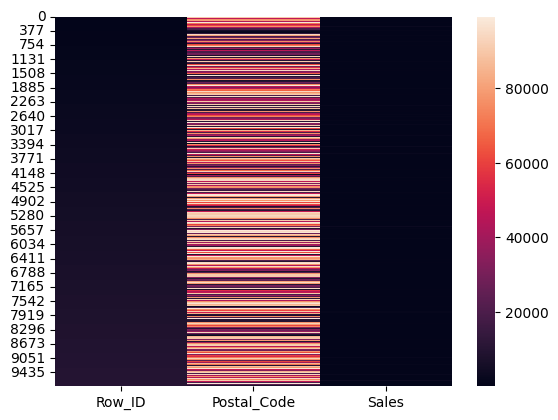

In [17]:
hist=df.select_dtypes(include=np.number)
sns.heatmap(data=hist)

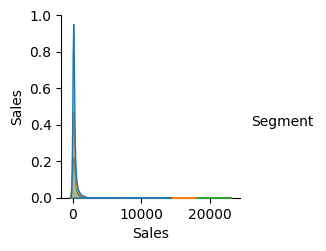

In [19]:
# será una matriz de gráficos de dispersión, donde cada gráfico mostrará la relación entre la variable 'Sales' y otra variable numérica en el DataFrame, 
#y los puntos estarán coloreados según la categoría de 'Segment'. Esta visualización 
#es útil para identificar patrones o tendencias en las ventas y cómo difieren entre los diferentes segmentos del mercado.
sns.pairplot(data=df,vars=['Sales'],hue='Segment')

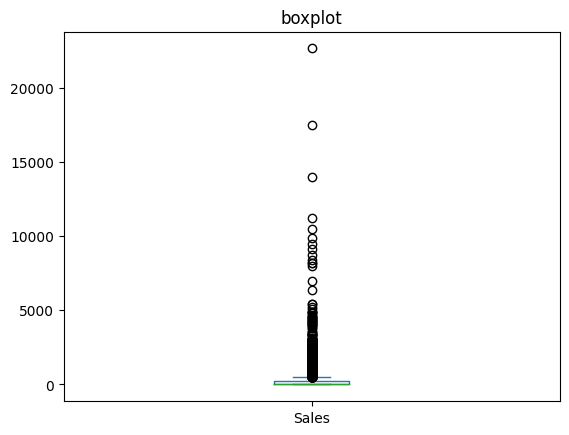

In [20]:
ax = df[['Sales']].plot(kind='box', title='boxplot')

crea un diagrama de caja para la columna 'Sales' del DataFrame 'df' y lo muestra en el eje de las coordenadas. El diagrama de caja mostrará la distribución de los valores de 'Sales', destacando la mediana, los cuartiles y los valores atípicos que puedan existir en los datos. Esto es útil para visualizar la dispersión y la variabilidad de la variable 'Sales'.

In [22]:
# S utiliza para obtener información sobre la estructura de un DataFrame y trabajar con las columnas de manera programática.
df.columns


Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

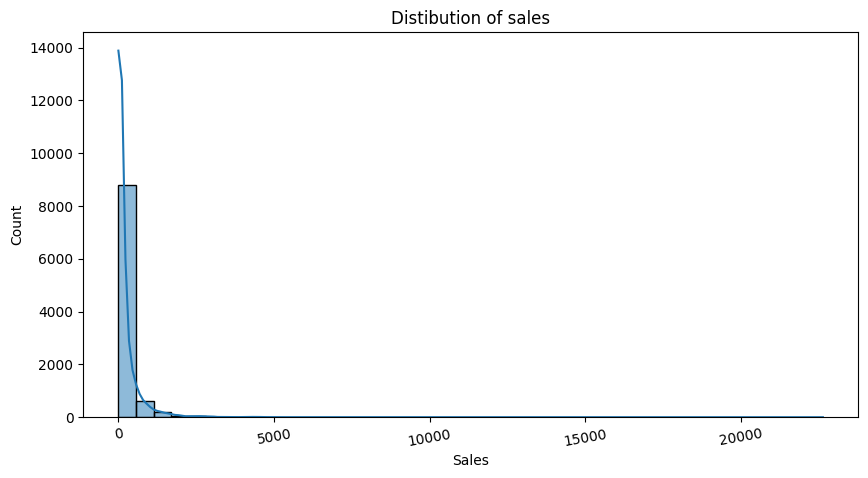

In [23]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df['Sales'],kde=True,bins=40)
plt.title('Distibution of sales')
plt.xticks(rotation=10)
plt.show()

se  crear un gráfico de distribución de las ventas (Sales) en el DataFrame 'df', mostrando tanto el histograma como la estimación de densidad del kernel para tener una idea de cómo se distribuyen los valores de ventas en el conjunto de datos.

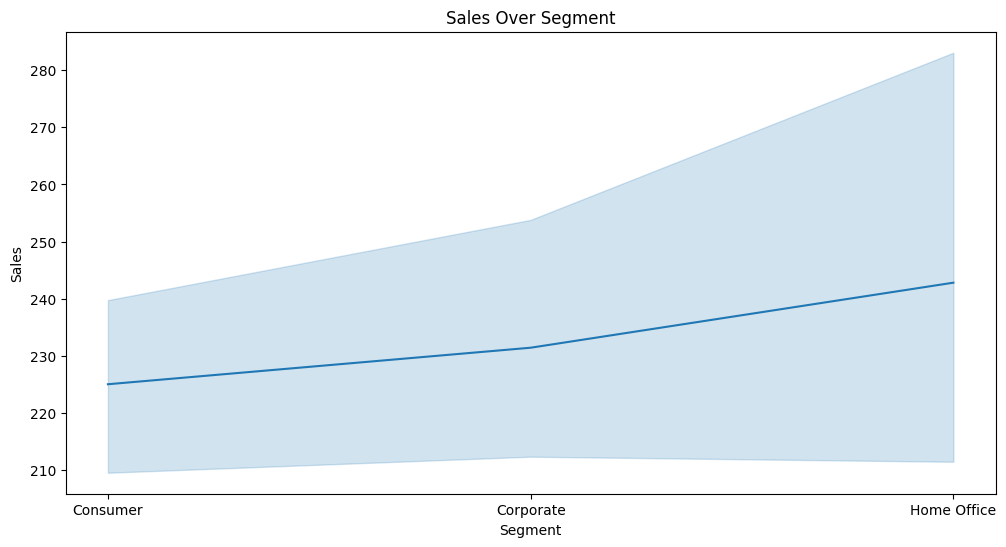

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Segment', y='Sales', data=df)
plt.title("Sales Over Segment")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.show()

visualizar las ventas en función de los diferentes segmentos mediante un gráfico de líneas, lo que permite identificar patrones y tendencias en las ventas para cada segmento. El gráfico puede ayudar a comprender cómo las ventas varían entre los segmentos y cómo se comporta cada segmento en términos de ventas.

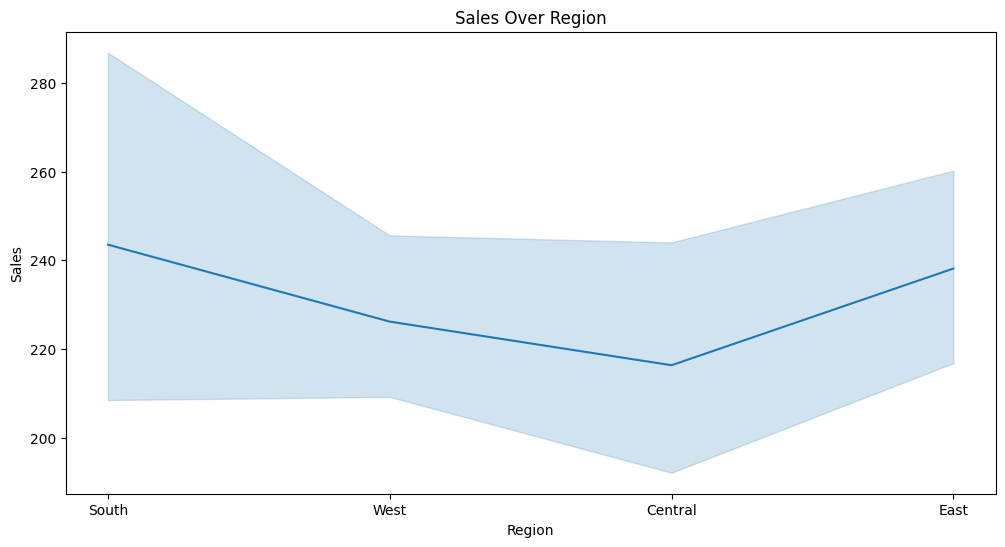

In [25]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Region', y='Sales', data=df)
plt.title("Sales Over Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()

se utiliza para visualizar las ventas en función de las diferentes regiones mediante un gráfico de líneas, lo que permite identificar patrones y tendencias en las ventas para cada región. El gráfico puede ayudar a comprender cómo las ventas varían entre las diferentes regiones y cómo se comporta cada región en términos de ventas.

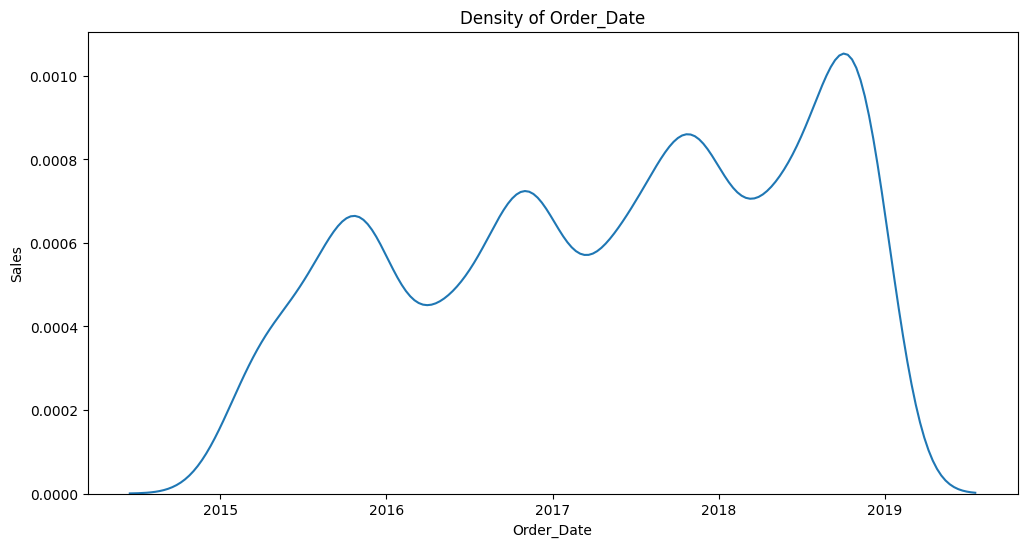

In [26]:
plt.figure(figsize=(12, 6))
sns.kdeplot(x='Order_Date', data=df)
plt.title("Density of Order_Date")
plt.xlabel("Order_Date")
plt.ylabel("Sales")
plt.show()

se utiliza para visualizar la densidad de las fechas de pedido (Order_Date) utilizando un gráfico de densidad (Kernel Density Estimation), lo que permite identificar cómo están distribuidos los datos en el eje x. El gráfico de densidad es útil para observar patrones en la concentración de fechas de pedido y ayuda a tener una idea de cuándo se realizaron la mayoría de los pedidos en función de las fechas.






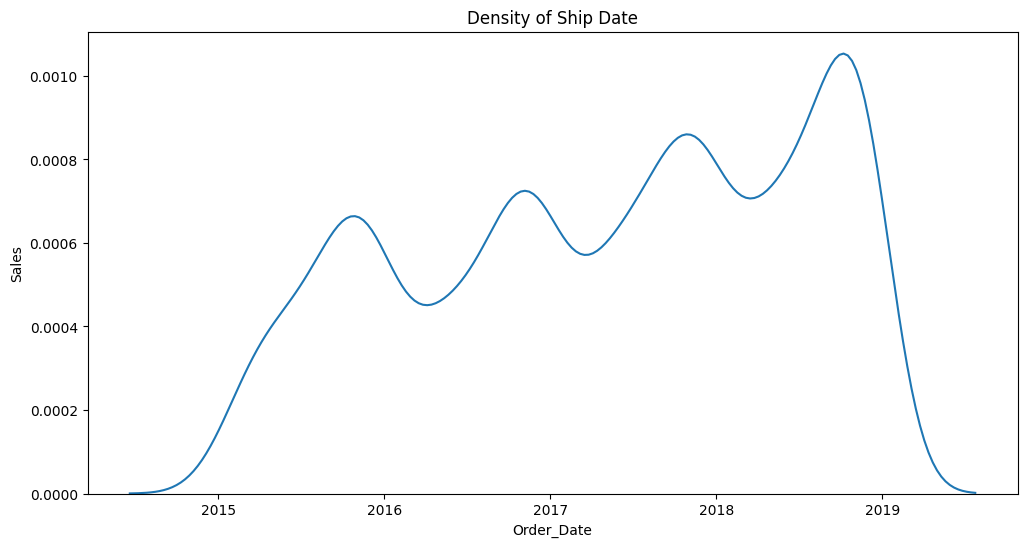

In [27]:
plt.figure(figsize=(12, 6))
sns.kdeplot(x='Ship_Date', data=df)
plt.title("Density of Ship Date")
plt.xlabel("Order_Date")
plt.ylabel("Sales")
plt.show()

se utiliza para visualizar la densidad de las fechas de envío (Ship_Date) utilizando un gráfico de densidad (Kernel Density Estimation), lo que permite identificar cómo están distribuidos los datos en el eje x. El gráfico de densidad es útil para observar patrones en la concentración de fechas de envío y ayuda a tener una idea de cuándo se realizaron la mayoría de los envíos en función de las fechas.

In [28]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales'],
      dtype='object')

es una herramienta útil para acceder a información sobre las columnas de un DataFrame y realizar diversas operaciones relacionadas con las etiquetas de las variables presentes en los datos.

In [47]:
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,day_of_week_order_date,day_of_week_Ship_Date,year_order_date,day_of_year_order_date,weekday_date_order_date,quarter_order_date,year_Ship_Date,day_of_year_Ship_Date,weekday_date_Ship_Date,quarter_Ship_Date
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,5,2017,312,2,4,2017,315,5,4
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,5,2017,312,2,4,2017,315,5,4
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,0,4,2017,163,0,2,2017,167,4,2
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,...,1,1,2016,285,1,4,2016,292,1,4
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,...,1,1,2016,285,1,4,2016,292,1,4


es útil para una rápida inspección de los datos y comprobar que se han cargado correctamente, especialmente cuando se trabaja con grandes conjuntos de datos en los que mostrar todo el DataFrame podría ser abrumador.

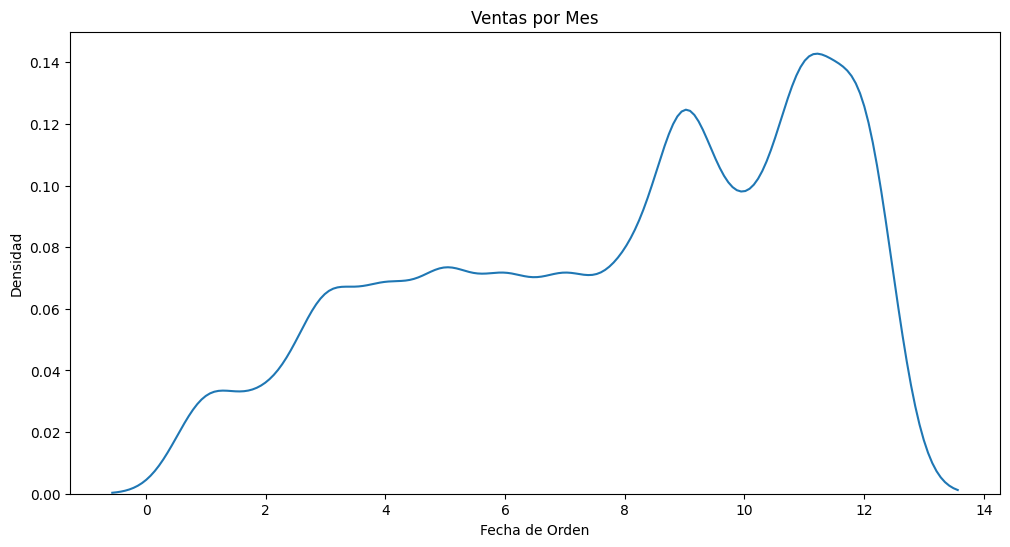

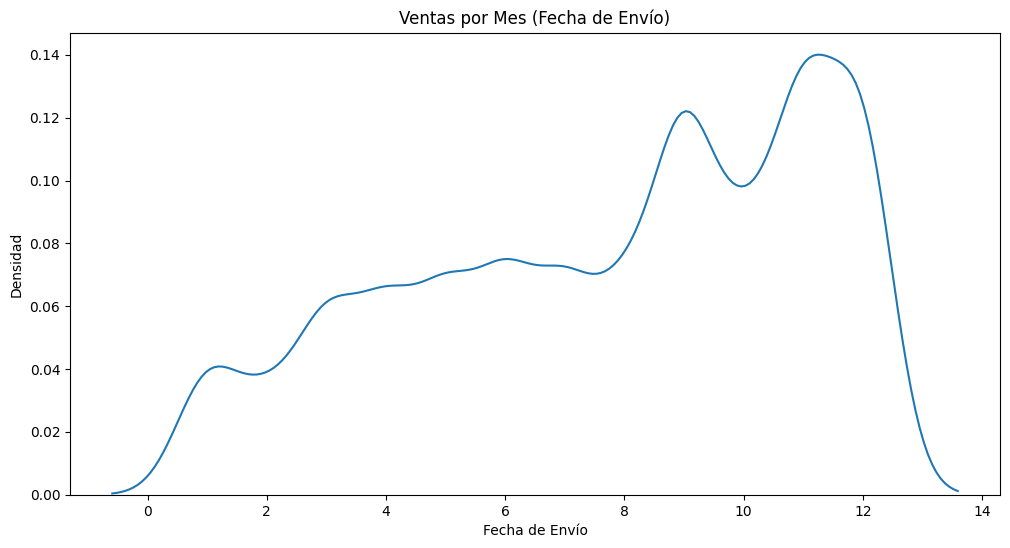

In [32]:
# Convertir la columna Order_Date al formato de fecha y hora
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

# Extraer el mes de la columna Order_Date
df['month_order_date'] = df['Order_Date'].dt.month

# Graficar el diagrama KDE para la columna month_order_date
plt.figure(figsize=(12, 6))
sns.kdeplot(x='month_order_date', data=df)
plt.title("Ventas por Mes")
plt.xlabel("Fecha de Orden")
plt.ylabel("Densidad")
plt.show()


# Convertir la columna Ship_Date al formato de fecha y hora
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

# Extraer el mes de la columna Ship_Date
df['month_Ship_Date'] = df['Ship_Date'].dt.month

# Graficar el diagrama KDE para la columna month_Ship_Date
plt.figure(figsize=(12, 6))
sns.kdeplot(x='month_Ship_Date', data=df)
plt.title("Ventas por Mes (Fecha de Envío)")
plt.xlabel("Fecha de Envío")
plt.ylabel("Densidad")
plt.show()


En resumen, este código es útil para visualizar la distribución de ventas a lo largo de los meses y analizar si hay algún patrón estacional o tendencias en las ventas en función del mes en que se realizaron los pedidos o se enviaron los productos.

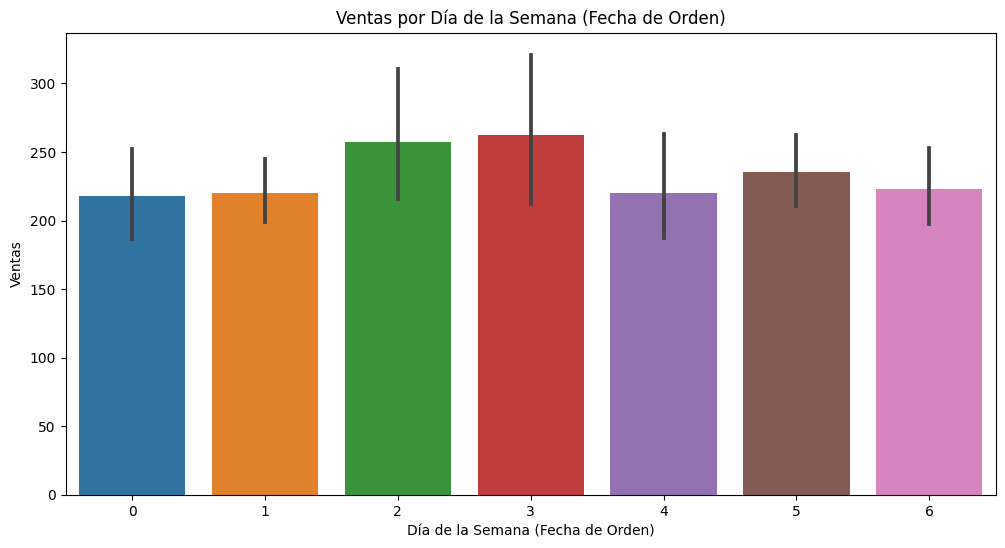

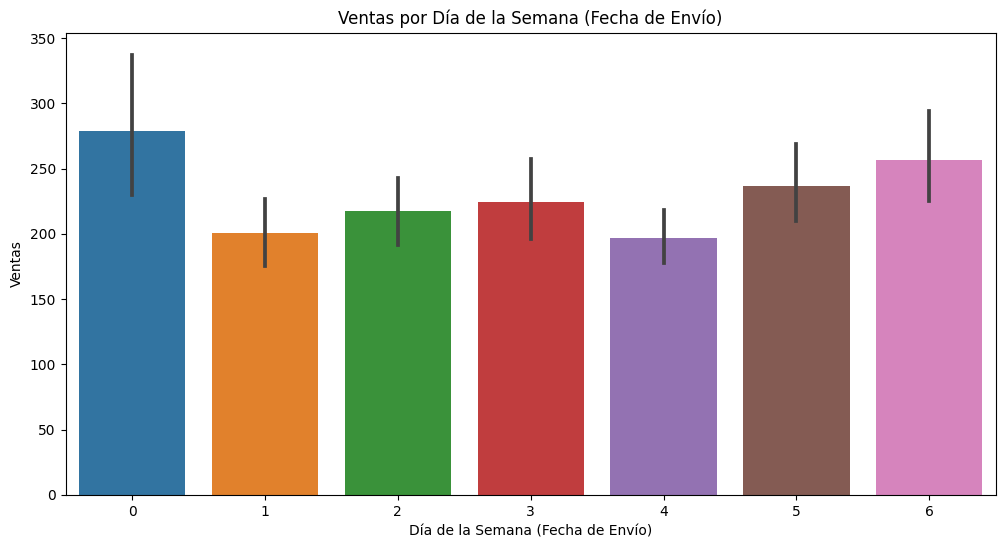

In [36]:
# Convertir la columna Ship_Date al formato de fecha y hora
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

# Extraer el día de la semana de la columna Ship_Date
df['day_of_week_Ship_Date'] = df['Ship_Date'].dt.dayofweek

plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week_order_date', y='Sales', data=df)
plt.title("Ventas por Día de la Semana (Fecha de Orden)")
plt.xlabel("Día de la Semana (Fecha de Orden)")
plt.ylabel("Ventas")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week_Ship_Date', y='Sales', data=df)
plt.title("Ventas por Día de la Semana (Fecha de Envío)")
plt.xlabel("Día de la Semana (Fecha de Envío)")
plt.ylabel("Ventas")
plt.show()




Estas visualizaciones permiten analizar si hay algún patrón o tendencia en las ventas en función del día de la semana en que se realizan los pedidos y en que se realizan los envíos. Por ejemplo, podría revelar si ciertos días de la semana son más populares para realizar pedidos o si los envíos realizados en ciertos días de la semana tienden a generar más ventas. Esta información puede ser útil para la planificación y estrategia comercial de una empresa.

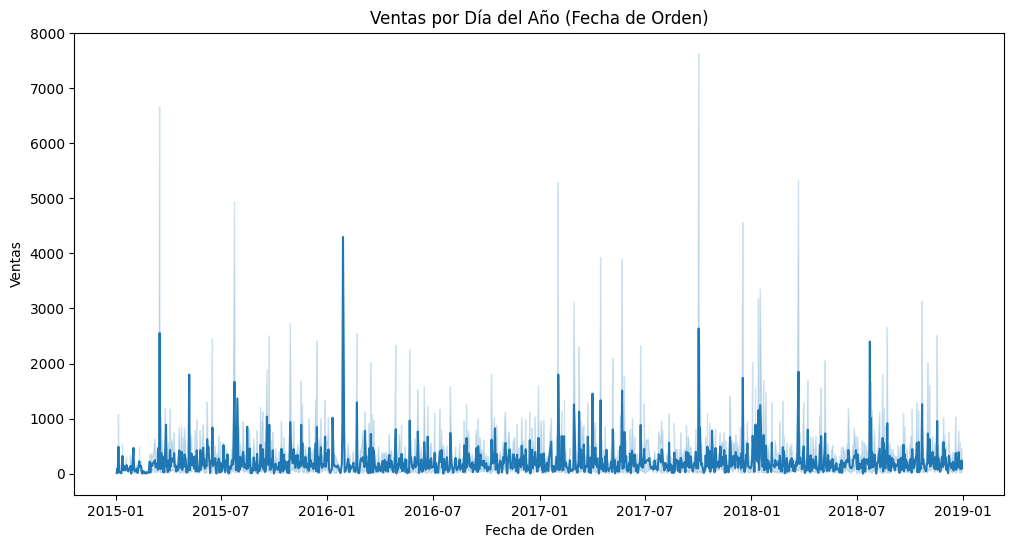

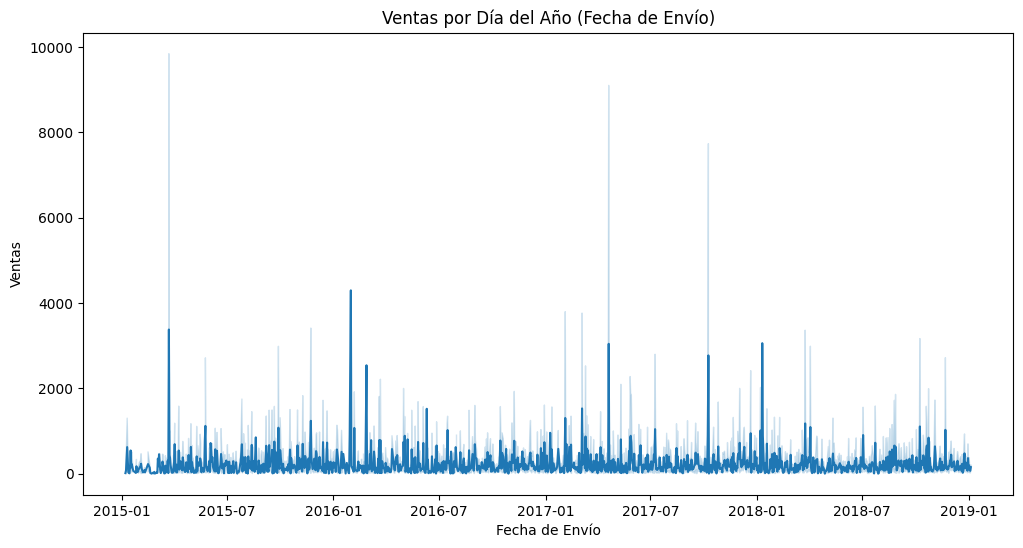

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order_Date', y='Sales', data=df)
plt.title("Ventas por Día del Año (Fecha de Orden)")
plt.xlabel("Fecha de Orden")
plt.ylabel("Ventas")
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Ship_Date', y='Sales', data=df)
plt.title("Ventas por Día del Año (Fecha de Envío)")
plt.xlabel("Fecha de Envío")
plt.ylabel("Ventas")
plt.show()


estos gráficos de líneas proporcionan información útil sobre las fluctuaciones de ventas a lo largo del año en función de las fechas de orden y envío, lo que puede ayudar a los analistas y tomadores de decisiones a comprender mejor el comportamiento de las ventas y planificar estrategias comerciales en consecuencia.






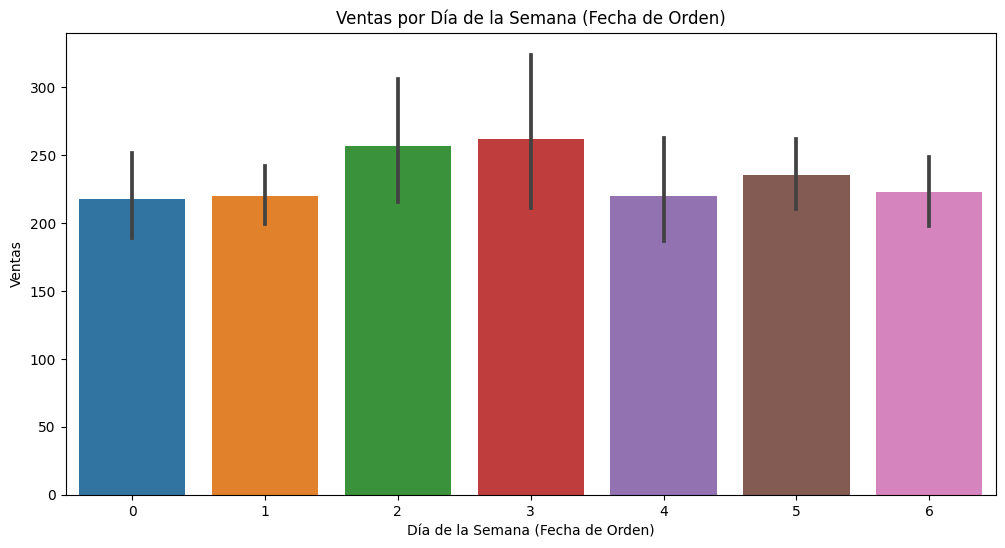

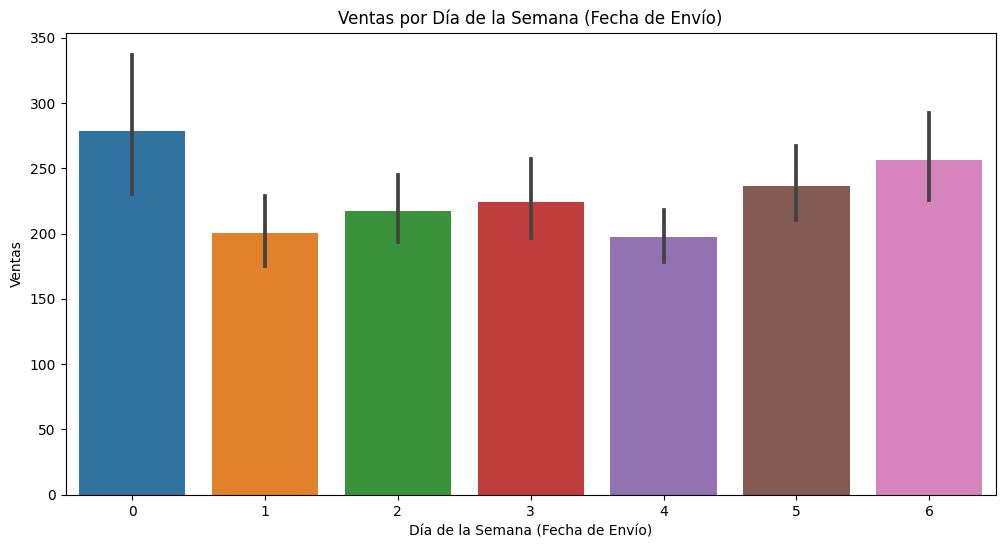

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week_order_date', y='Sales', data=df)
plt.title("Ventas por Día de la Semana (Fecha de Orden)")
plt.xlabel("Día de la Semana (Fecha de Orden)")
plt.ylabel("Ventas")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week_Ship_Date', y='Sales', data=df)
plt.title("Ventas por Día de la Semana (Fecha de Envío)")
plt.xlabel("Día de la Semana (Fecha de Envío)")
plt.ylabel("Ventas")
plt.show()


En resumen, estos gráficos ayudan a visualizar cómo las ventas están distribuidas en diferentes días de la semana, lo que puede proporcionar información valiosa sobre el comportamiento de compra de los clientes y las tendencias comerciales. También pueden ayudar a tomar decisiones estratégicas, como planificar campañas de marketing o ajustar las operaciones logísticas para optimizar el rendimiento de ventas.

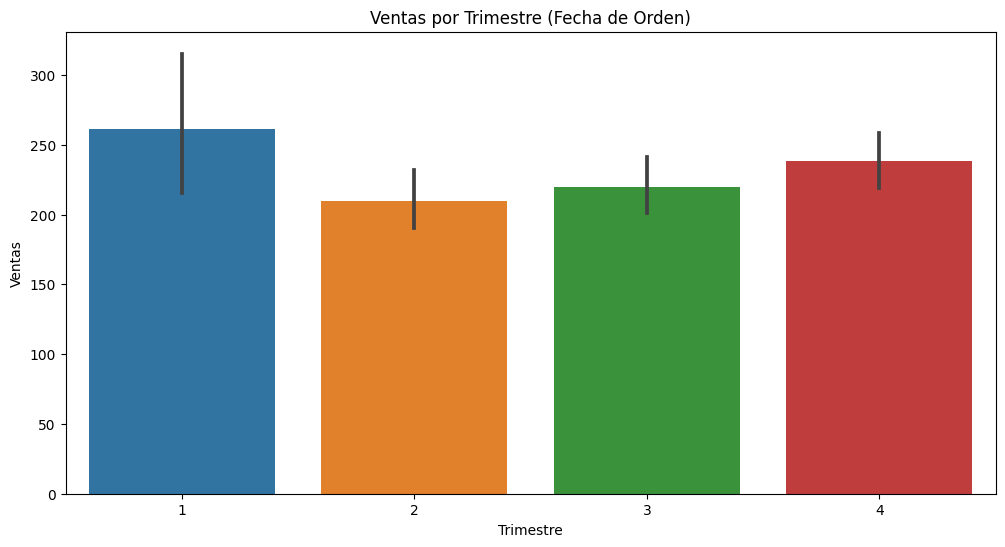

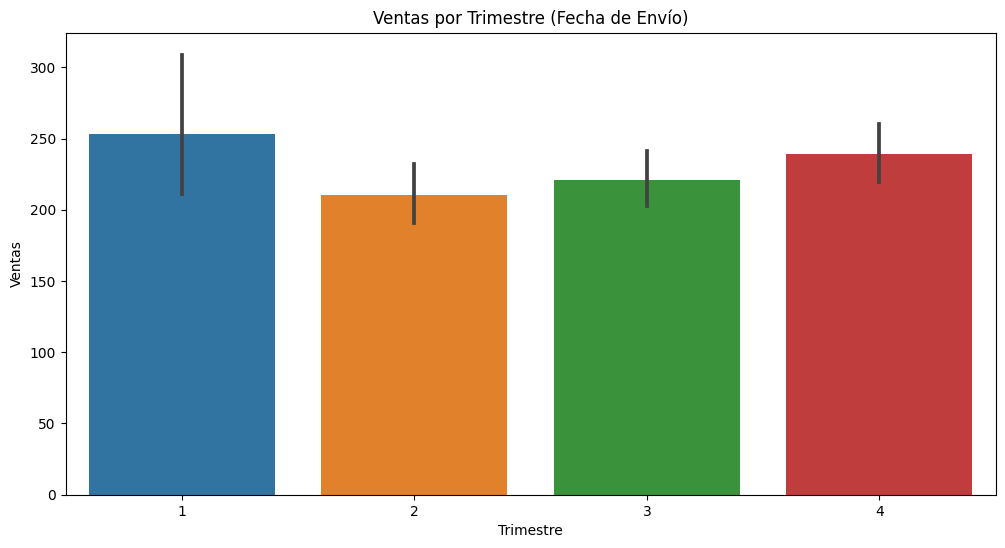

In [48]:
# verifica el bloque de codigo donde definimos, por trimestres 

plt.figure(figsize=(12, 6))
sns.barplot(x='quarter_order_date', y='Sales', data=df)
plt.title("Ventas por Trimestre (Fecha de Orden)")
plt.xlabel("Trimestre")
plt.ylabel("Ventas")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='quarter_Ship_Date', y='Sales', data=df)
plt.title("Ventas por Trimestre (Fecha de Envío)")
plt.xlabel("Trimestre")
plt.ylabel("Ventas")
plt.show()



En resumen, el código sirve para visualizar la distribución de las ventas a lo largo de los trimestres y las semanas del año, lo que puede ser útil para identificar patrones estacionales o tendencias en las ventas. Además, los gráficos de barras son una forma efectiva de comparar fácilmente las ventas en diferentes períodos de tiempo.

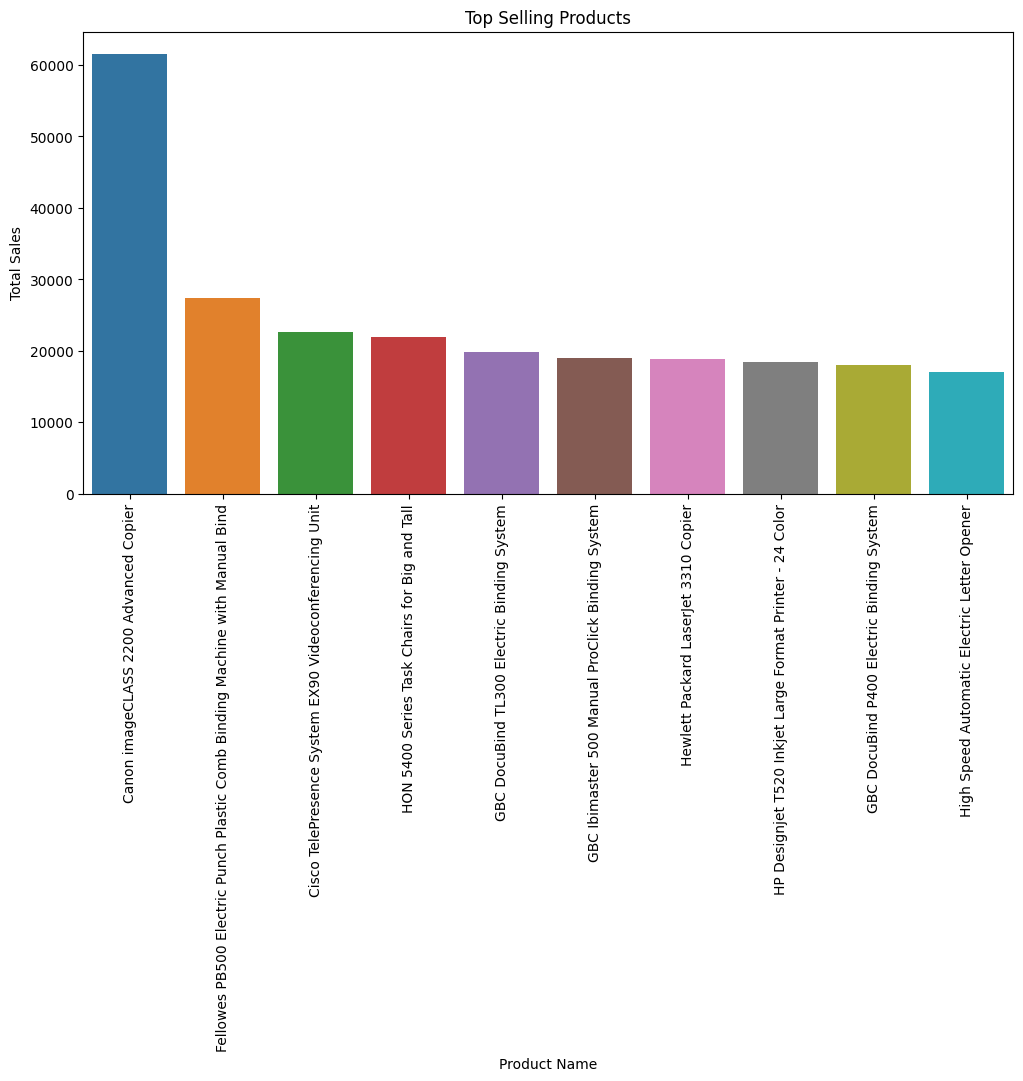

In [49]:
most_sold_products = df.groupby('Product_Name')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_products.index, y=most_sold_products.values)
plt.xticks(rotation=90)
plt.title("Top Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.show()

En resumen, este código sirve para visualizar los 10 productos más vendidos en forma de gráfico de barras. Es útil para identificar rápidamente los productos que están generando más ventas y comparar su desempeño con otros productos. El gráfico proporciona una representación visual de las ventas totales de los productos, lo que puede ser útil para la toma de decisiones y análisis de ventas.

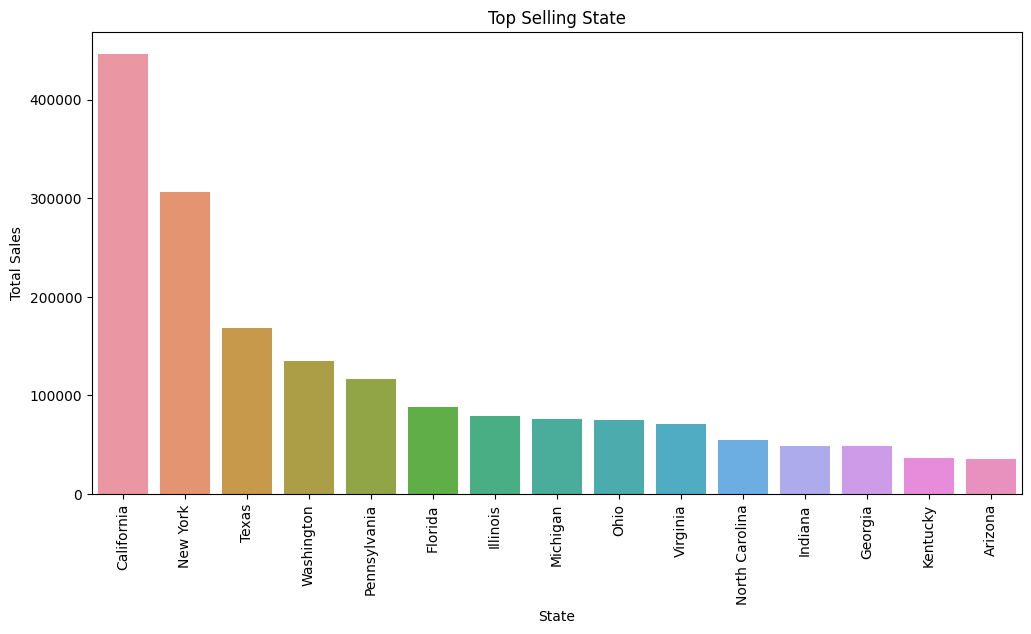

In [50]:
most_sold_State = df.groupby('State')['Sales'].sum().nlargest(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_State.index, y=most_sold_State.values)
plt.xticks(rotation=90)
plt.title("Top Selling State")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.show()

En resumen, este código sirve para visualizar los 15 estados con mayores ventas en forma de gráfico de barras. Es útil para identificar rápidamente los estados que están generando más ventas y comparar su desempeño con otros estados. El gráfico proporciona una representación visual de las ventas totales por estado, lo que puede ser útil para la toma de decisiones y análisis de ventas a nivel estatal.

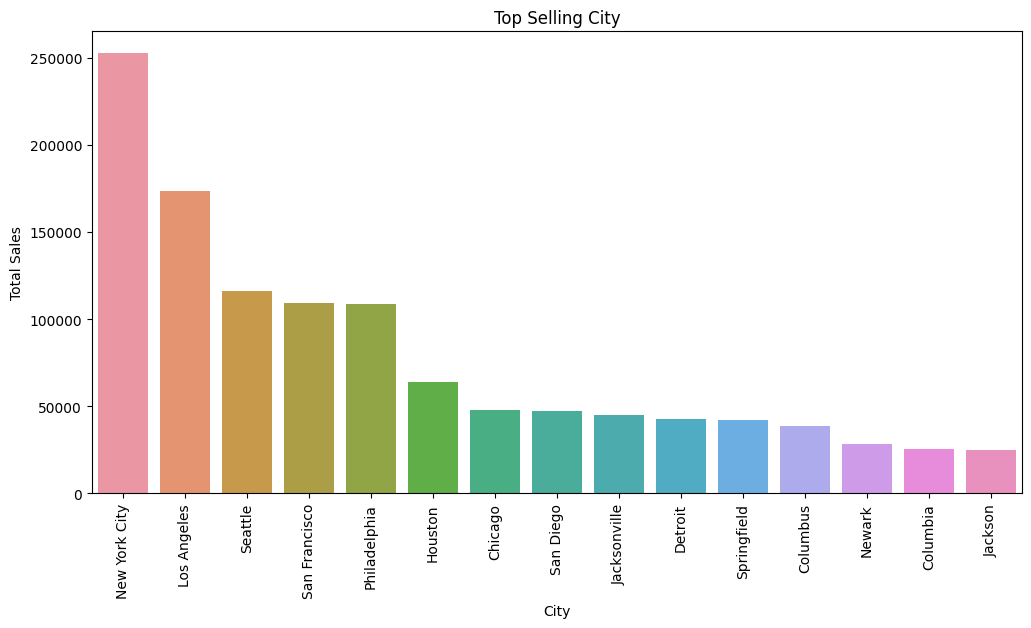

In [51]:
most_sold_City = df.groupby('City')['Sales'].sum().nlargest(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_City.index, y=most_sold_City.values)
plt.xticks(rotation=90)
plt.title("Top Selling City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.show()

En resumen, este código sirve para visualizar las 15 ciudades con mayores ventas en forma de gráfico de barras. Es útil para identificar rápidamente las ciudades que están generando más ventas y comparar su desempeño con otras ciudades. El gráfico proporciona una representación visual de las ventas totales por ciudad, lo que puede ser útil para la toma de decisiones y análisis de ventas a nivel local.

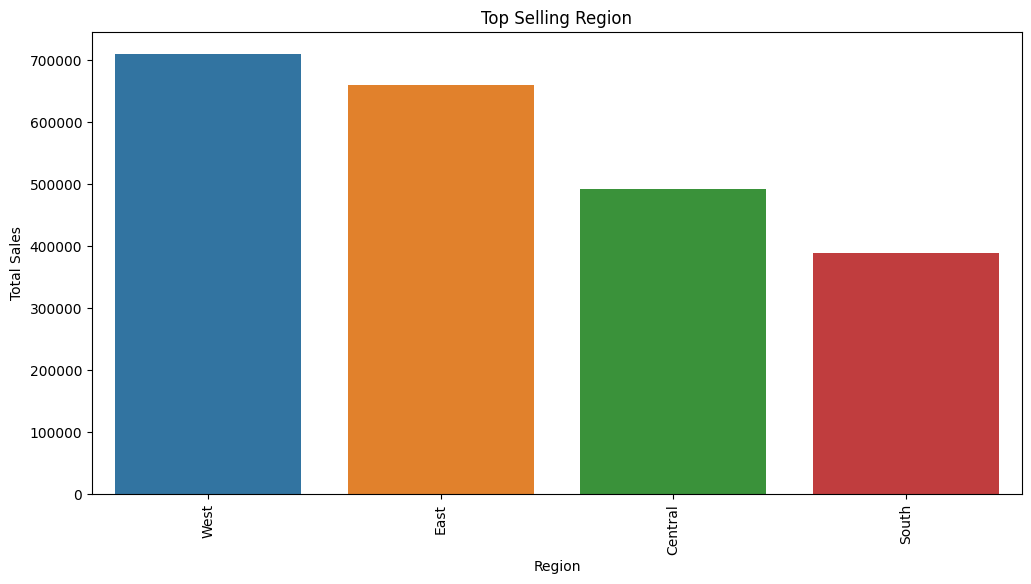

In [52]:
most_sold_in_Region = df.groupby('Region')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_in_Region.index, y=most_sold_in_Region.values)
plt.xticks(rotation=90)
plt.title("Top Selling Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.show()

En resumen, este código sirve para visualizar las 10 regiones con mayores ventas en forma de gráfico de barras. Es útil para identificar rápidamente las regiones que están generando más ventas y comparar su desempeño con otras regiones. El gráfico proporciona una representación visual de las ventas totales por región, lo que puede ser útil para la toma de decisiones y análisis de ventas a nivel regional.

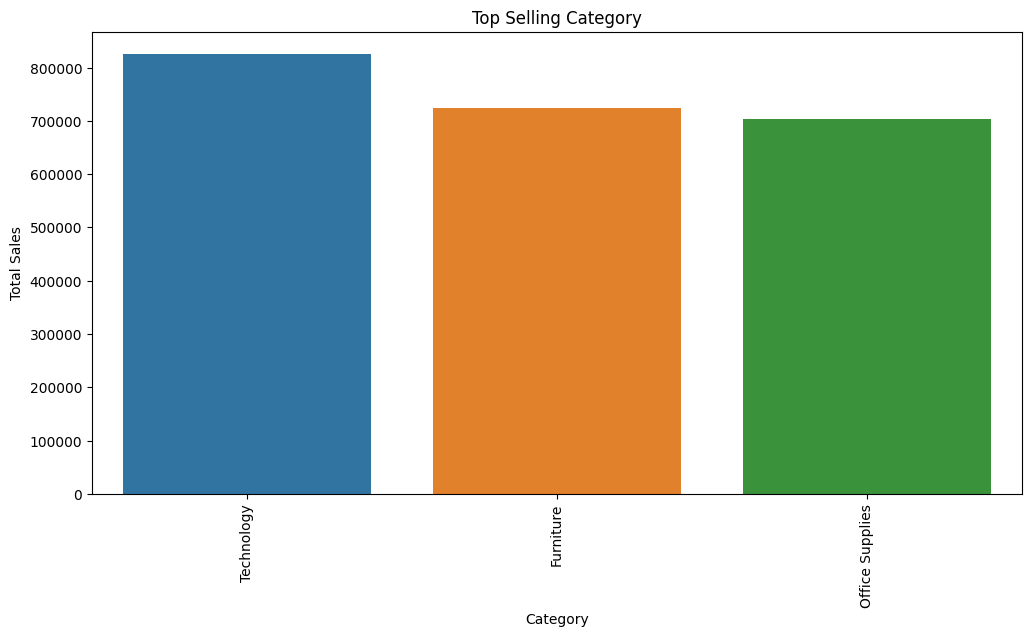

In [53]:
most_sold_Category = df.groupby('Category')['Sales'].sum().nlargest(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_Category.index, y=most_sold_Category.values)
plt.xticks(rotation=90)
plt.title("Top Selling Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()

En resumen, este código te permite visualizar las 15 categorías de productos con mayores ventas en forma de un gráfico de barras. Es útil para identificar las categorías de productos más populares y exitosas en términos de ventas, lo que puede proporcionar información valiosa para la toma de decisiones comerciales y estrategias de marketing. El gráfico te ofrece una representación visual clara de las ventas totales por categoría, lo que facilita la comparación entre diferentes categorías.

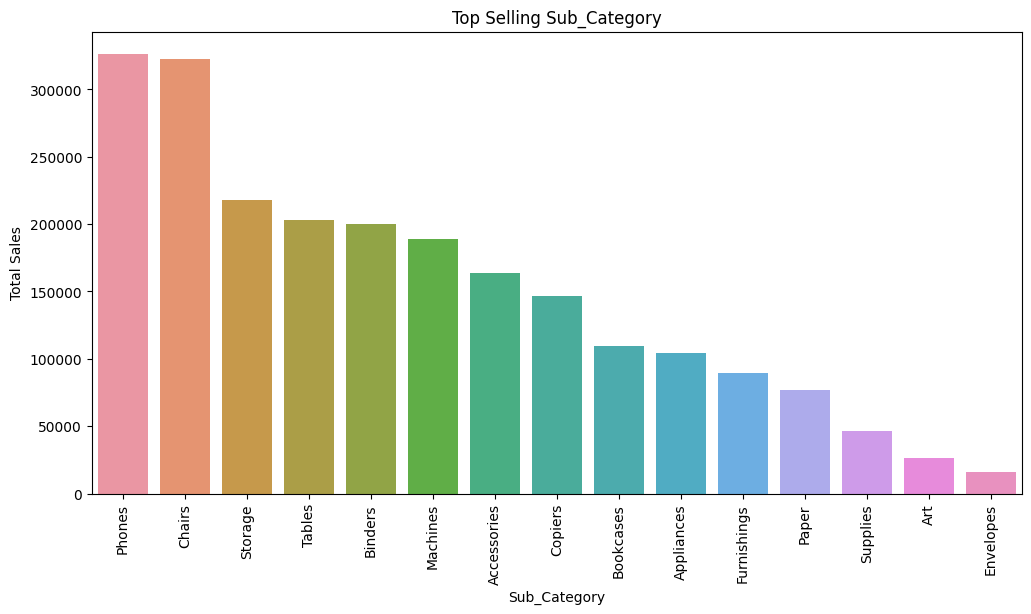

In [54]:
most_sold_Sub_Category = df.groupby('Sub_Category')['Sales'].sum().nlargest(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_Sub_Category.index, y=most_sold_Sub_Category.values)
plt.xticks(rotation=90)
plt.title("Top Selling Sub_Category")
plt.xlabel("Sub_Category")
plt.ylabel("Total Sales")
plt.show()

En resumen, este código te permite visualizar las 15 subcategorías de productos con mayores ventas en forma de un gráfico de barras. Es útil para identificar las subcategorías de productos más populares y exitosas en términos de ventas, lo que puede proporcionar información valiosa para la toma de decisiones comerciales, el análisis de inventario y la optimización de la oferta de productos. El gráfico te ofrece una representación visual clara de las ventas totales por subcategoría, lo que facilita la comparación entre diferentes subcategorías.

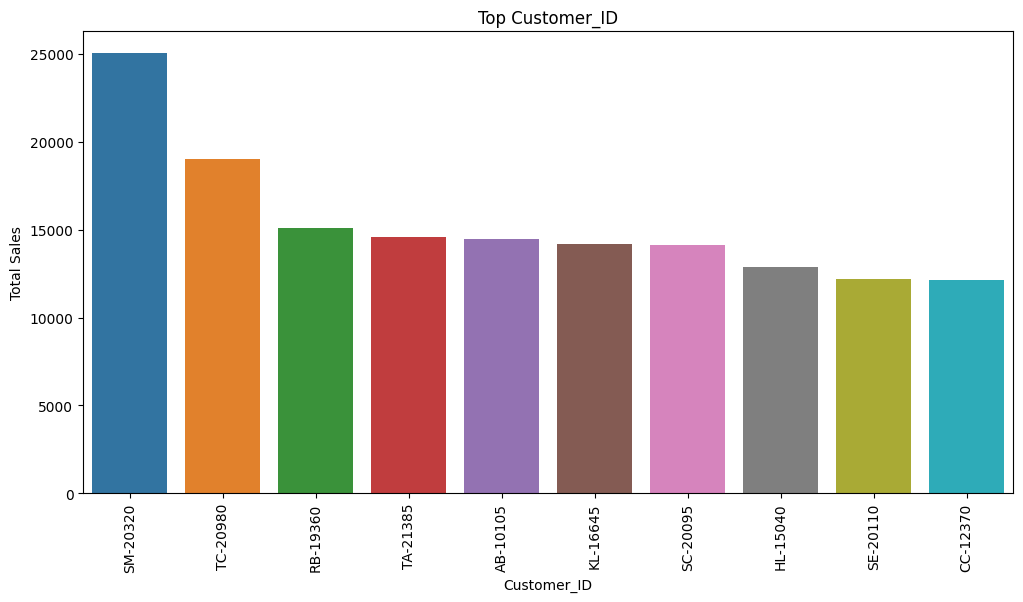

In [55]:
most_sold_Customer_ID = df.groupby('Customer_ID')['Sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=most_sold_Customer_ID.index, y=most_sold_Customer_ID.values)
plt.xticks(rotation=90)
plt.title("Top Customer_ID")
plt.xlabel("Customer_ID")
plt.ylabel("Total Sales")
plt.show()

En resumen, este código te permite visualizar los 10 clientes con mayores ventas en forma de un gráfico de barras. Es útil para identificar a los clientes más valiosos en términos de ventas y comprender su contribución al volumen total de ventas. El gráfico te ofrece una representación visual clara de las ventas totales por cliente, lo que facilita la identificación de los clientes más importantes para el negocio y puede ayudar a enfocar las estrategias de retención y marketing.

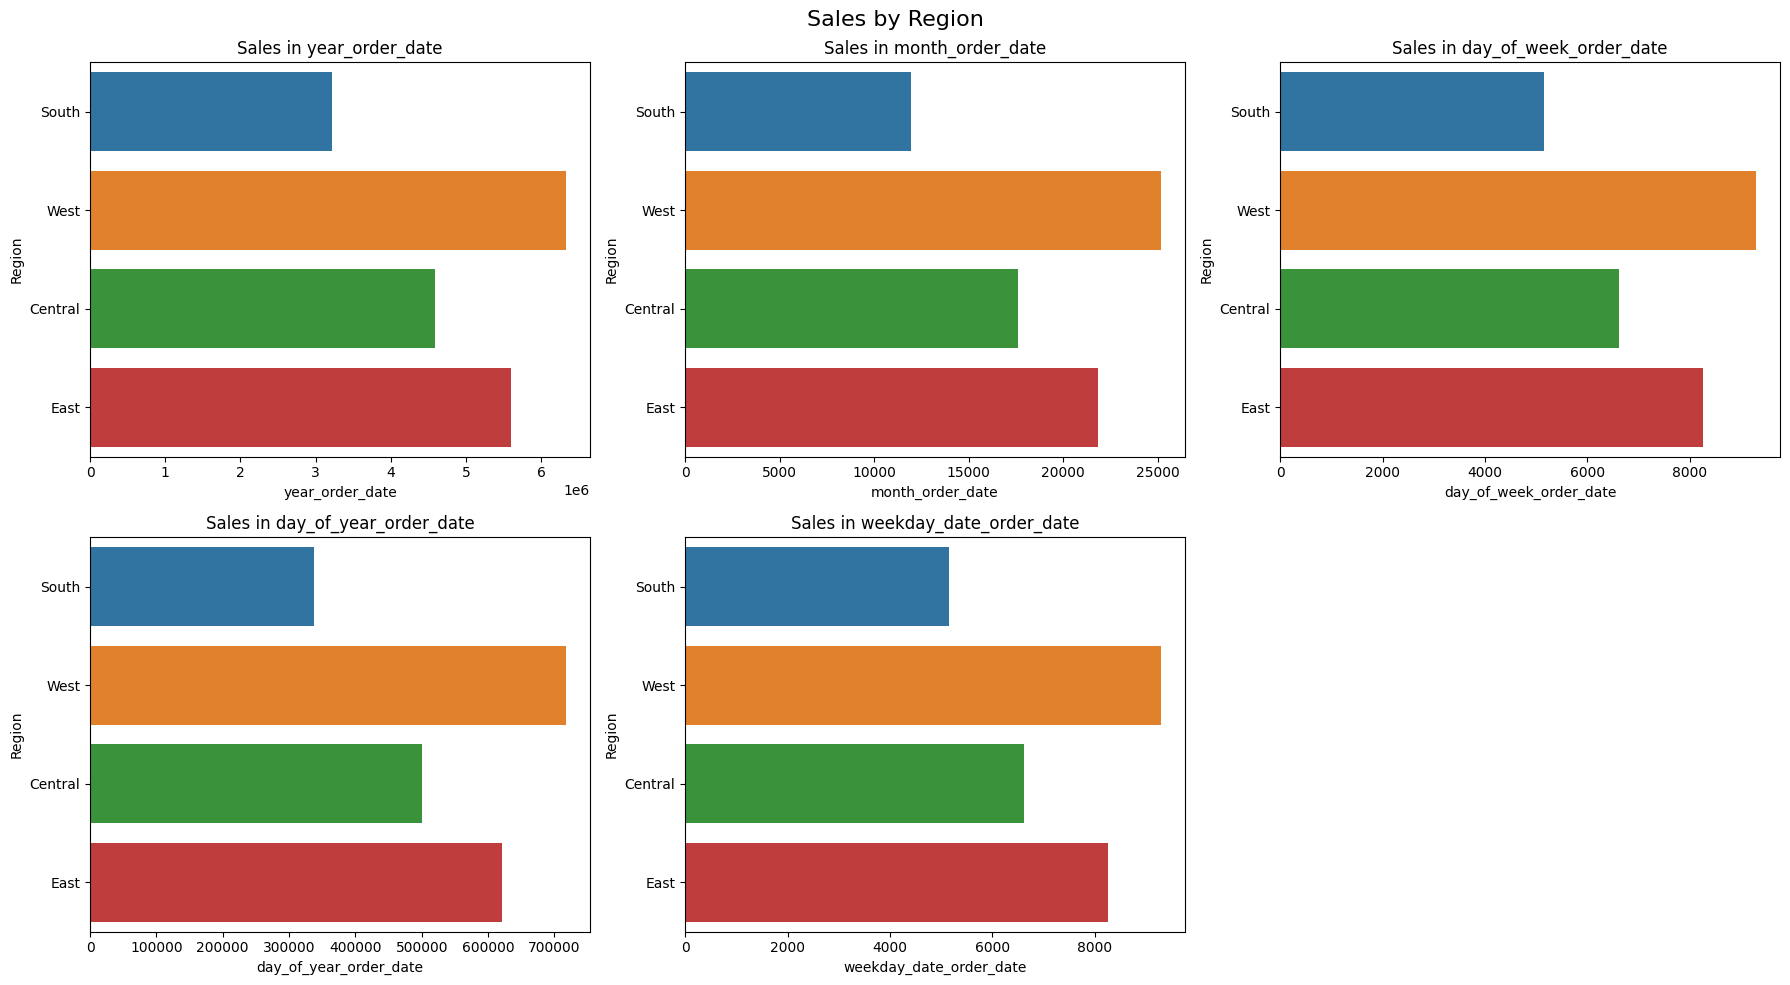

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
axes[-1].remove()

for index, Sales in enumerate(["year_order_date","month_order_date","day_of_week_order_date","day_of_year_order_date","weekday_date_order_date"]):
    sns.barplot(data= df, x=Sales,y="Region",
                estimator=sum,
                ci=None,
                ax=axes[index]).set_title("Sales in "+Sales.split("_Sales")[0])
   
plt.suptitle("Sales by Region", fontsize=16)
plt.tight_layout()
plt.show()

La utilidad de este código es permitirte analizar y comparar fácilmente las ventas en diferentes intervalos de tiempo y ver cómo varían las ventas por región en esos períodos. Puedes identificar tendencias, patrones estacionales o cambios en el comportamiento de compra a lo largo del tiempo. Además, al tener varios gráficos de barras en una cuadrícula, puedes tener una visión general y comparativa de las ventas en diferentes escalas temporales, lo que facilita el análisis y la toma de decisiones.

Por ejemplo, al examinar el gráfico de barras "Sales by Year", puedes ver cómo han evolucionado las ventas de cada región año tras año. Al observar el gráfico "Sales by Month", podrías identificar si hay algún patrón estacional recurrente en las ventas. El gráfico "Sales by Day of Week" podría ayudarte a ver si hay días específicos de la semana en los que las ventas son más altas o más bajas, y así sucesivamente para los demás gráficos.

En resumen, el código es una herramienta para el análisis exploratorio de datos y la visualización de las ventas por región en diferentes periodos de tiempo, lo que puede proporcionar información valiosa para comprender el rendimiento del negocio y tomar decisiones informadas.

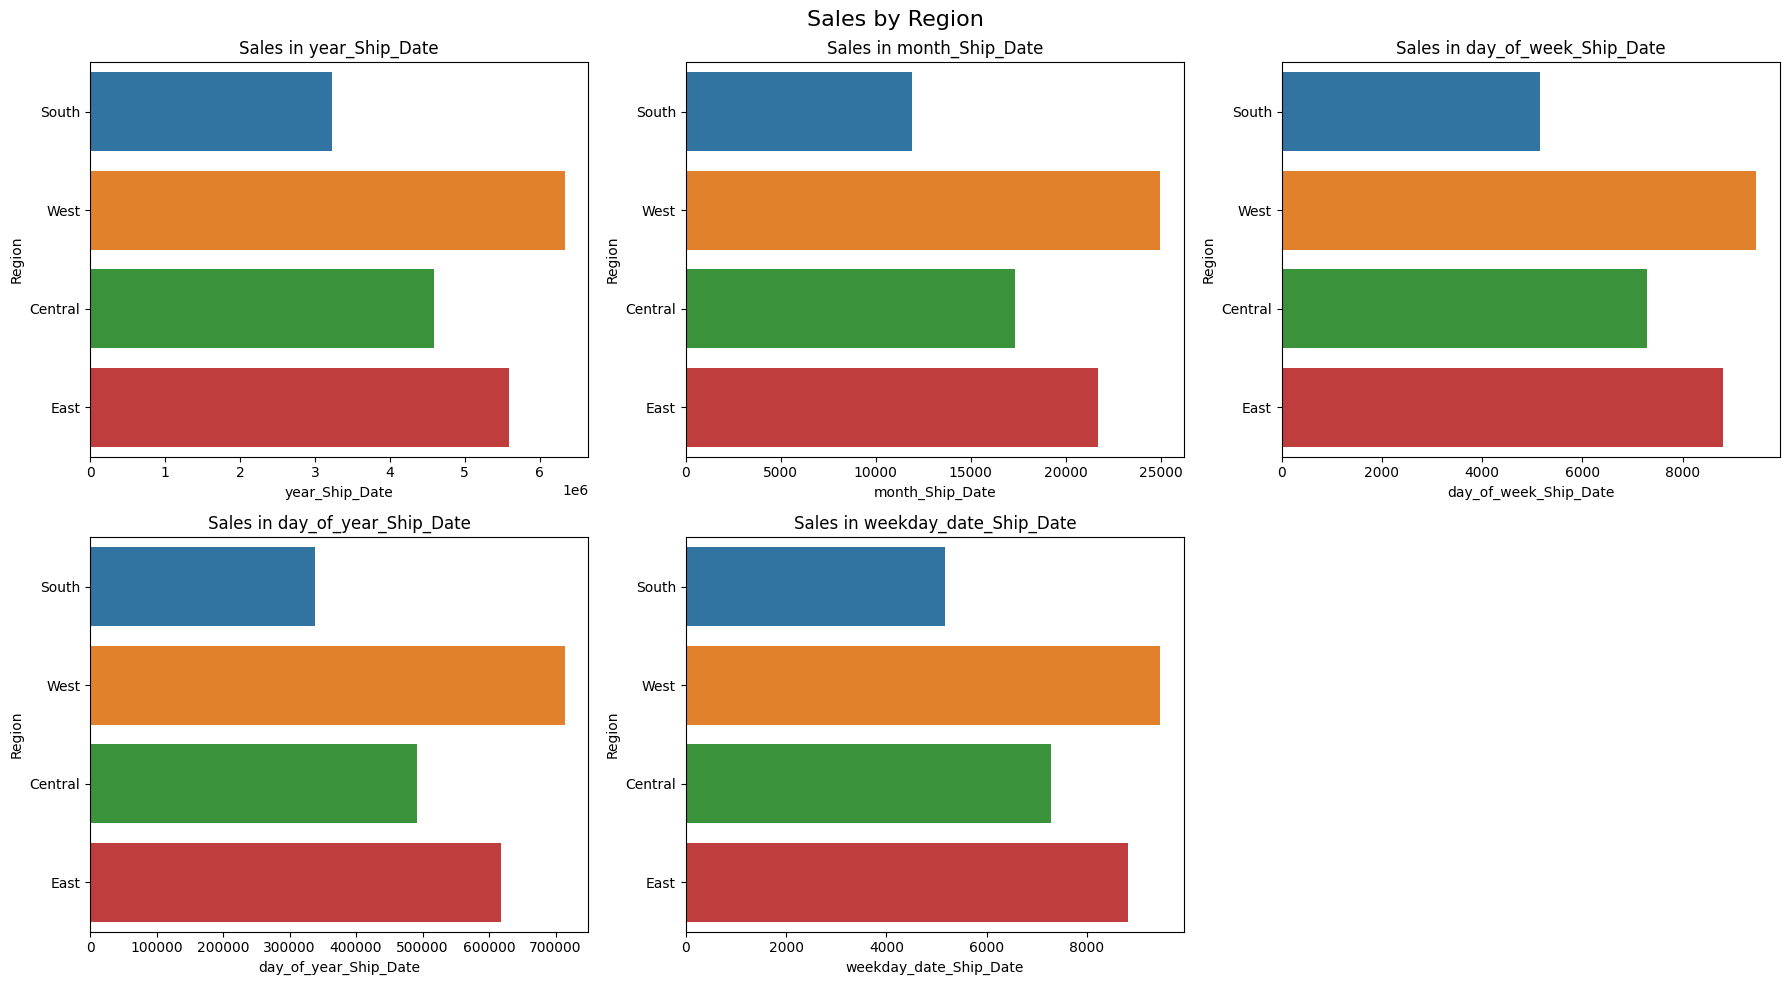

In [57]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
axes[-1].remove()

for index, Sales in enumerate(['year_Ship_Date','month_Ship_Date', 'day_of_week_Ship_Date', 'day_of_year_Ship_Date','weekday_date_Ship_Date']):
    sns.barplot(data= df, x=Sales,y="Region",
                estimator=sum,
                ci=None,
                ax=axes[index]).set_title("Sales in "+Sales.split("_Sales")[0])
   
plt.suptitle("Sales by Region", fontsize=16)
plt.tight_layout()
plt.show()

El resultado es una cuadrícula de gráficos de barras que muestran cómo varían las ventas por región en diferentes periodos de tiempo relacionados con las fechas de envío. Cada gráfico tiene un título que indica el período de tiempo representado en el eje x.

El título principal ("Sales by Region") y el diseño apretado (plt.tight_layout()) ayudan a presentar los gráficos de manera organizada y cohesiva.

En resumen, este código es otra herramienta para el análisis exploratorio de datos y la visualización de las ventas por región en diferentes escalas temporales basadas en las fechas de envío, lo que puede proporcionar información valiosa para comprender el rendimiento del negocio y tomar decisiones informadas.

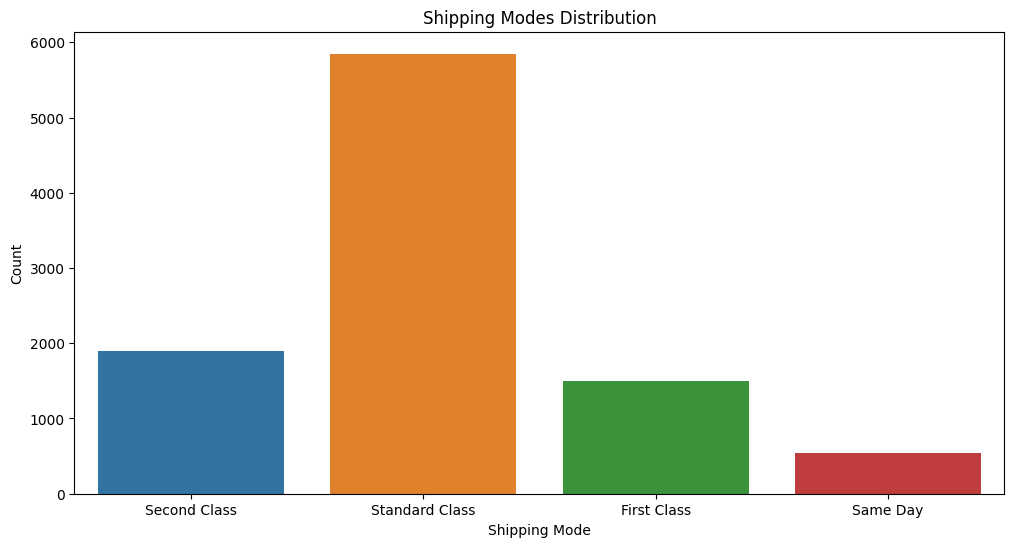

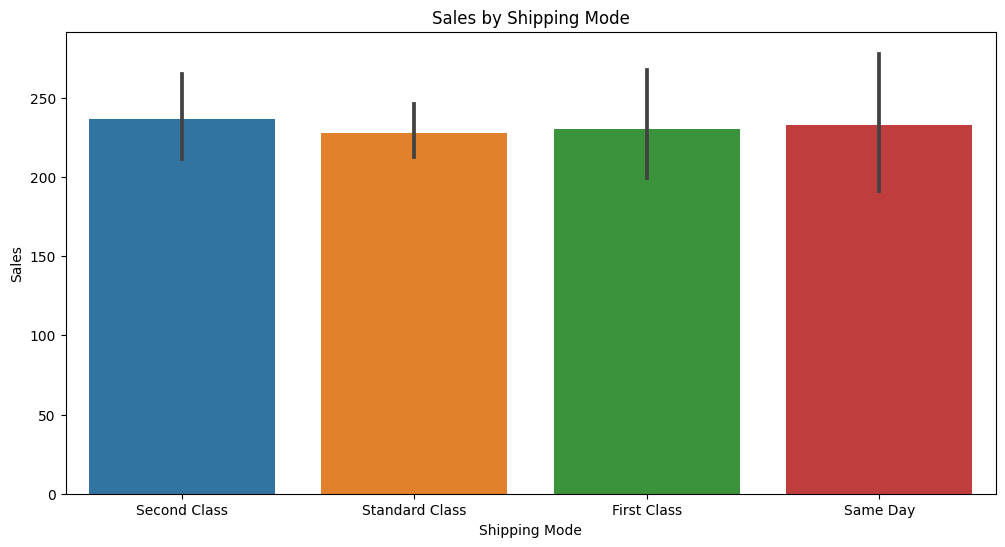

In [58]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Ship_Mode', data=df)
plt.title("Shipping Modes Distribution")
plt.xlabel("Shipping Mode")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Ship_Mode', y='Sales', data=df)
plt.title("Sales by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Sales")
plt.show()


Primer gráfico:
plt.figure(figsize=(12, 6)): Crea una nueva figura con un tamaño de 12 pulgadas de ancho y 6 pulgadas de alto para acomodar el gráfico.
sns.countplot(x='Ship_Mode', data=df): Crea un gráfico de conteo (count plot) donde en el eje x se muestra el modo de envío (Ship_Mode) y en el eje y se muestra el recuento de ocurrencias de cada modo. Este gráfico muestra cuántas veces aparece cada modo de envío en el conjunto de datos.
plt.title("Shipping Modes Distribution"): Establece el título del gráfico.
plt.xlabel("Shipping Mode"): Establece la etiqueta del eje x.
plt.ylabel("Count"): Establece la etiqueta del eje y.
plt.show(): Muestra el gráfico de distribución de los modos de envío.
Este gráfico es útil para visualizar la cantidad de veces que aparece cada modo de envío en el conjunto de datos y para comparar la popularidad de los diferentes modos de envío.

Segundo gráfico:
plt.figure(figsize=(12, 6)): Crea una nueva figura con el mismo tamaño que el gráfico anterior.
sns.barplot(x='Ship_Mode', y='Sales', data=df): Crea un gráfico de barras donde en el eje x se muestra el modo de envío (Ship_Mode) y en el eje y se muestra la suma de ventas (Sales) asociadas a cada modo de envío. Este gráfico muestra la relación entre los modos de envío y las ventas generadas por cada uno.
plt.title("Sales by Shipping Mode"): Establece el título del gráfico.
plt.xlabel("Shipping Mode"): Establece la etiqueta del eje x.
plt.ylabel("Sales"): Establece la etiqueta del eje y.
plt.show(): Muestra el gráfico de las ventas por modo de envío.
Este gráfico de barras es útil para comparar visualmente las ventas generadas por cada modo de envío y puede proporcionar información valiosa sobre qué modos de envío están generando más ventas y cuáles podrían ser menos eficientes desde el punto de vista de ventas.

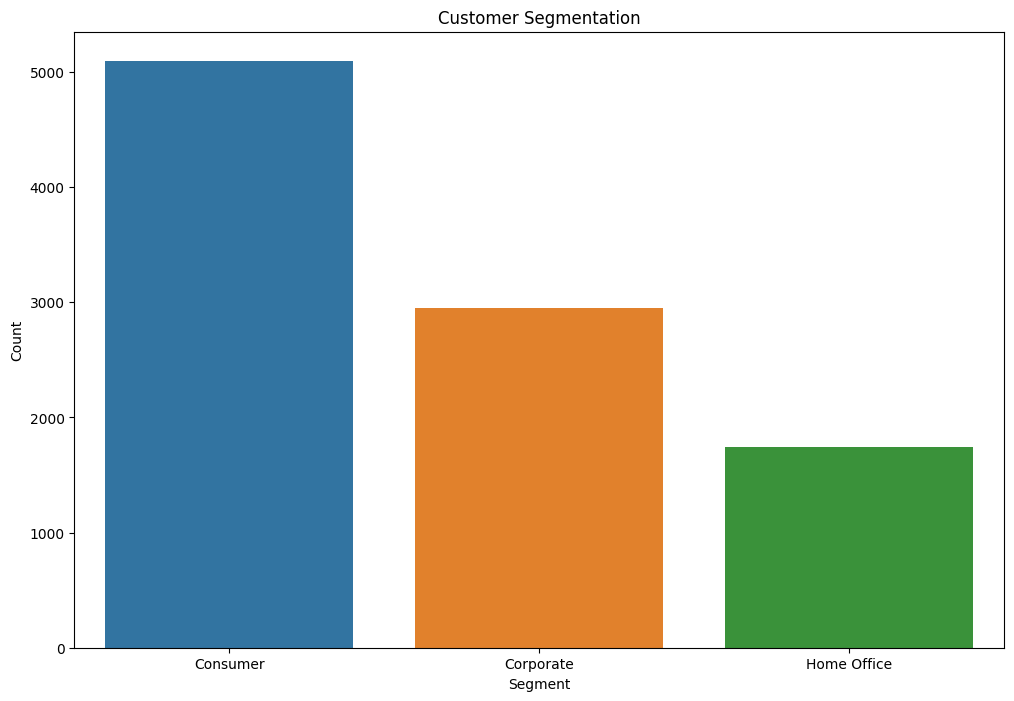

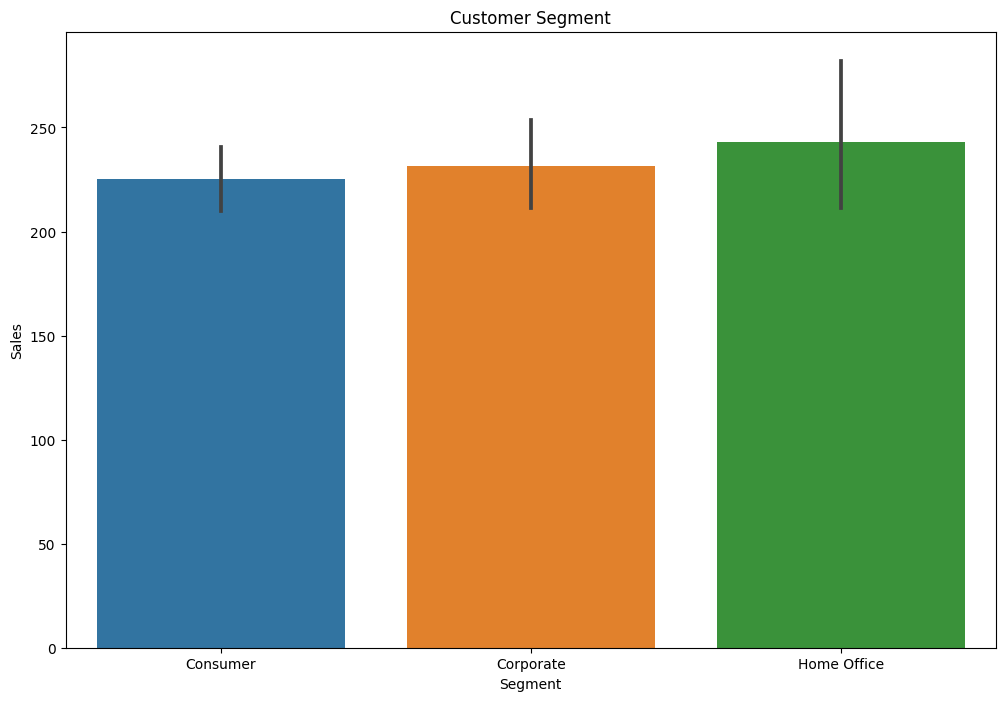

In [59]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Segment', data=df)
plt.title("Customer Segmentation")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Segment', y='Sales', data=df)
plt.title("Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Sales")
plt.show()


Primer gráfico:
plt.figure(figsize=(12, 8)): Crea una nueva figura con un tamaño de 12 pulgadas de ancho y 8 pulgadas de alto para acomodar el gráfico.
sns.countplot(x='Segment', data=df): Crea un gráfico de conteo (count plot) donde en el eje x se muestra el segmento de clientes (Segment) y en el eje y se muestra el recuento de ocurrencias de cada segmento. Este gráfico muestra cuántas veces aparece cada segmento de clientes en el conjunto de datos.
plt.title("Customer Segmentation"): Establece el título del gráfico.
plt.xlabel("Segment"): Establece la etiqueta del eje x.
plt.ylabel("Count"): Establece la etiqueta del eje y.
plt.show(): Muestra el gráfico de segmentación de clientes.
Este gráfico de conteo es útil para visualizar la distribución de clientes en diferentes segmentos y puede ayudar a entender la distribución de la base de clientes.

Segundo gráfico:
plt.figure(figsize=(12, 8)): Crea una nueva figura con el mismo tamaño que el gráfico anterior.
sns.barplot(x='Segment', y='Sales', data=df): Crea un gráfico de barras donde en el eje x se muestra el segmento de clientes (Segment) y en el eje y se muestra la suma de ventas (Sales) asociadas a cada segmento de clientes. Este gráfico muestra la relación entre los segmentos de clientes y las ventas generadas por cada uno.
plt.title("Customer Segment"): Establece el título del gráfico.
plt.xlabel("Segment"): Establece la etiqueta del eje x.
plt.ylabel("Sales"): Establece la etiqueta del eje y.
plt.show(): Muestra el gráfico de ventas por segmento de clientes.
Este gráfico de barras es útil para comparar visualmente las ventas generadas por cada segmento de clientes y puede proporcionar información valiosa sobre qué segmentos de clientes están generando más ventas y cuáles son más rentables para el negocio.

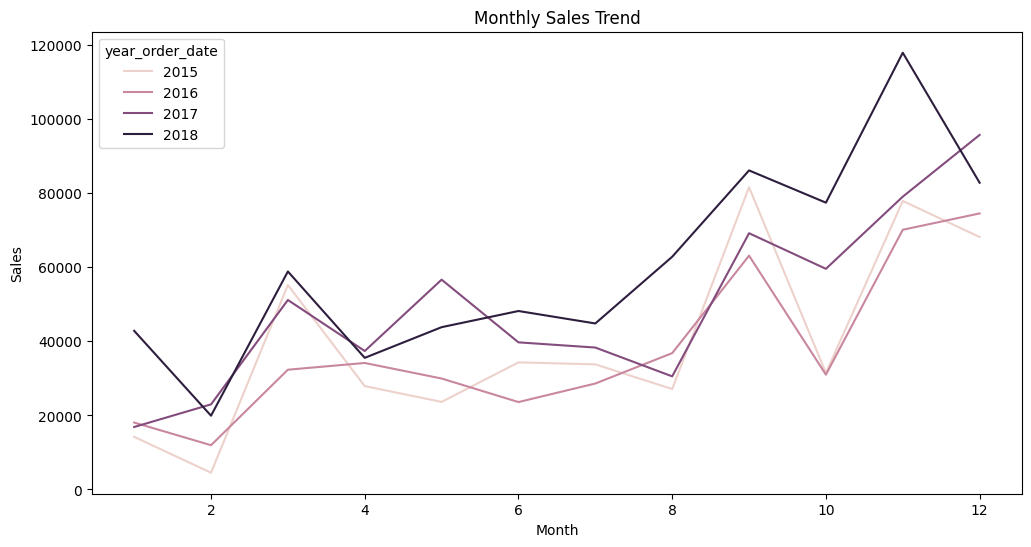

In [60]:
monthly_trend = df.groupby(['year_order_date', 'month_order_date'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_order_date', y='Sales', hue='year_order_date', data=monthly_trend)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

monthly_trend = df.groupby(['year_order_date', 'month_order_date'])['Sales'].sum().reset_index(): En esta línea, se crea un nuevo DataFrame llamado monthly_trend. Se agrupa el DataFrame original df por el año de la fecha de pedido (year_order_date) y el mes de la fecha de pedido (month_order_date). Luego, se suma las ventas (Sales) para cada combinación de año y mes. El método reset_index() se utiliza para reorganizar los resultados en una nueva estructura de DataFrame con las columnas year_order_date, month_order_date, y Sales.

plt.figure(figsize=(12, 6)): Crea una nueva figura con un tamaño de 12 pulgadas de ancho y 6 pulgadas de alto para acomodar el gráfico de líneas.

sns.lineplot(x='month_order_date', y='Sales', hue='year_order_date', data=monthly_trend): Se utiliza Seaborn para crear el gráfico de líneas. En el eje x se muestra el mes de la fecha de pedido (month_order_date), en el eje y se muestra la suma de ventas (Sales), y se utiliza el argumento hue para diferenciar las líneas por año de la fecha de pedido (year_order_date). Esto generará una línea para cada año que muestra la tendencia de las ventas a lo largo de los meses.

plt.title("Monthly Sales Trend"): Establece el título del gráfico.

plt.xlabel("Month"): Establece la etiqueta del eje x.

plt.ylabel("Sales"): Establece la etiqueta del eje y.

plt.show(): Muestra el gráfico de tendencia mensual de ventas.

Este gráfico es útil para identificar patrones o tendencias en las ventas a lo largo de los meses y puede proporcionar información sobre si hay algún patrón estacional o si las ventas han aumentado o disminuido en diferentes períodos del año. También permite comparar la evolución de las ventas entre diferentes años.

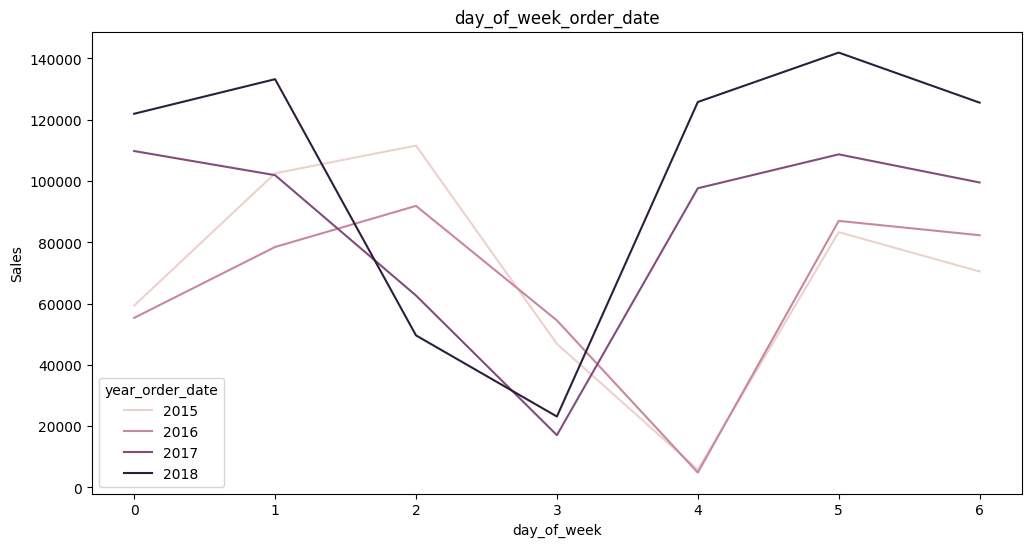

In [61]:
day_of_week_trend = df.groupby(['year_order_date', 'day_of_week_order_date'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='day_of_week_order_date', y='Sales', hue='year_order_date', data=day_of_week_trend)
plt.title("day_of_week_order_date")
plt.xlabel("day_of_week")
plt.ylabel("Sales")
plt.show()

day_of_week_trend = df.groupby(['year_order_date', 'day_of_week_order_date'])['Sales'].sum().reset_index(): En esta línea, se crea un nuevo DataFrame llamado day_of_week_trend. Se agrupa el DataFrame original df por el año de la fecha de pedido (year_order_date) y el día de la semana de la fecha de pedido (day_of_week_order_date). Luego, se suma las ventas (Sales) para cada combinación de año y día de la semana. El método reset_index() se utiliza para reorganizar los resultados en una nueva estructura de DataFrame con las columnas year_order_date, day_of_week_order_date, y Sales.

plt.figure(figsize=(12, 6)): Crea una nueva figura con un tamaño de 12 pulgadas de ancho y 6 pulgadas de alto para acomodar el gráfico de líneas.

sns.lineplot(x='day_of_week_order_date', y='Sales', hue='year_order_date', data=day_of_week_trend): Se utiliza Seaborn para crear el gráfico de líneas. En el eje x se muestra el día de la semana de la fecha de pedido (day_of_week_order_date), en el eje y se muestra la suma de ventas (Sales), y se utiliza el argumento hue para diferenciar las líneas por año de la fecha de pedido (year_order_date). Esto generará una línea para cada año que muestra la tendencia de las ventas según el día de la semana.

plt.title("day_of_week_order_date"): Establece el título del gráfico.

plt.xlabel("day_of_week"): Establece la etiqueta del eje x.

plt.ylabel("Sales"): Establece la etiqueta del eje y.

plt.show(): Muestra el gráfico de tendencia de ventas según el día de la semana.

Este gráfico es útil para analizar si existen diferencias significativas en las ventas según el día de la semana. Puede ayudar a identificar patrones de comportamiento de los clientes, como picos de ventas en ciertos días o días con ventas más bajas. También permite comparar la evolución de las ventas según el día de la semana entre diferentes años.






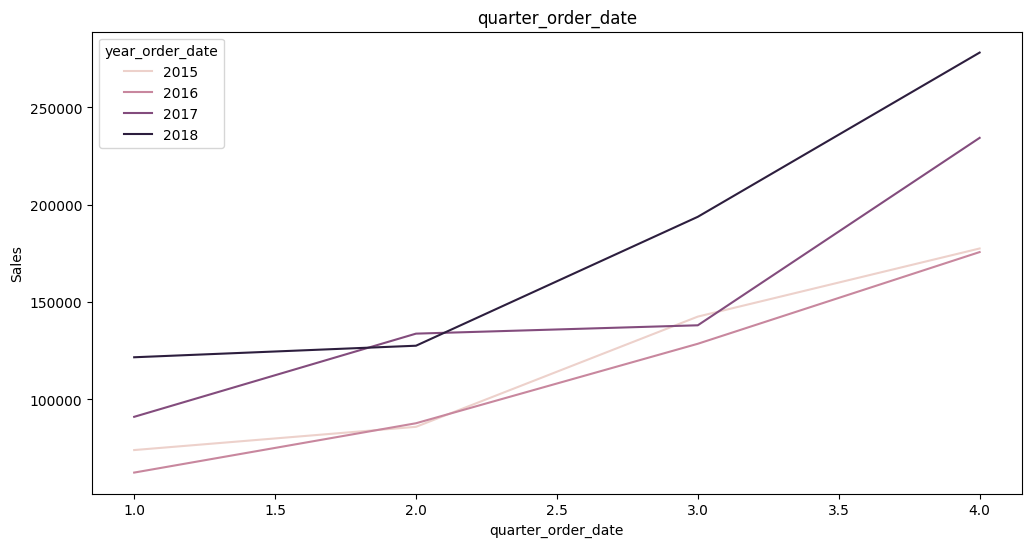

In [62]:
quarter_order_date = df.groupby(['year_order_date', 'quarter_order_date'])['Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='quarter_order_date', y='Sales', hue='year_order_date', data=quarter_order_date)
plt.title("quarter_order_date")
plt.xlabel("quarter_order_date")
plt.ylabel("Sales")
plt.show()


quarter_order_date = df.groupby(['year_order_date', 'quarter_order_date'])['Sales'].sum().reset_index(): En esta línea, se crea un nuevo DataFrame llamado quarter_order_date. Se agrupa el DataFrame original df por el año de la fecha de pedido (year_order_date) y el trimestre de la fecha de pedido (quarter_order_date). Luego, se suma las ventas (Sales) para cada combinación de año y trimestre. El método reset_index() se utiliza para reorganizar los resultados en una nueva estructura de DataFrame con las columnas year_order_date, quarter_order_date y Sales.

plt.figure(figsize=(12, 6)): Crea una nueva figura con un tamaño de 12 pulgadas de ancho y 6 pulgadas de alto para acomodar el gráfico de líneas.

sns.lineplot(x='quarter_order_date', y='Sales', hue='year_order_date', data=quarter_order_date): Se utiliza Seaborn para crear el gráfico de líneas. En el eje x se muestra el trimestre de la fecha de pedido (quarter_order_date), en el eje y se muestra la suma de ventas (Sales), y se utiliza el argumento hue para diferenciar las líneas por año de la fecha de pedido (year_order_date). Esto generará una línea para cada año que muestra la tendencia de las ventas según el trimestre.

plt.title("quarter_order_date"): Establece el título del gráfico.

plt.xlabel("quarter_order_date"): Establece la etiqueta del eje x.

plt.ylabel("Sales"): Establece la etiqueta del eje y.

plt.show(): Muestra el gráfico de tendencia de ventas según el trimestre.

Este gráfico es útil para analizar si existen diferencias significativas en las ventas según el trimestre del año. Puede ayudar a identificar patrones estacionales en las ventas, como trimestres con ventas más altas o más bajas. También permite comparar la evolución de las ventas según el trimestre entre diferentes años.






ANOVA Test Results:
F-statistic: 0.09097298566337089
P-value: 0.965036695995067
Result: Fail to Reject Null Hypothesis - There is no significant difference in average sales across different shipping modes.


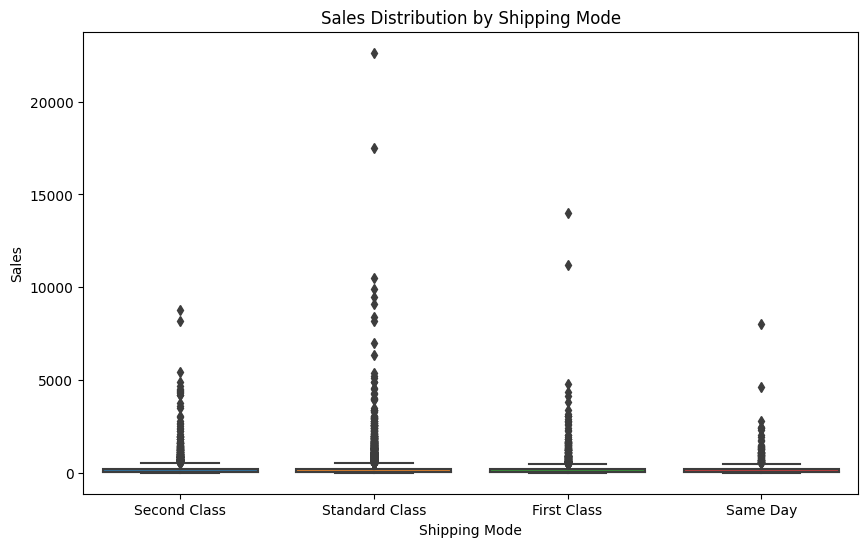

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the dataset
store = pd.read_csv('superstore_final_dataset (1).csv',encoding= 'unicode_escape')

# Hypothesis Testing - ANOVA Test
shipping_modes = df['Ship_Mode'].unique()
grouped_data = [df[df['Ship_Mode'] == mode]['Sales'] for mode in shipping_modes]

# Perform ANOVA test
f_stat, p_value = f_oneway(*grouped_data)
alpha = 0.05

print("ANOVA Test Results:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Result: Reject Null Hypothesis - There are significant differences in average sales across different shipping modes.")
else:
    print("Result: Fail to Reject Null Hypothesis - There is no significant difference in average sales across different shipping modes.")

# Post-hoc Analysis (Tukey's HSD Test) - Only if ANOVA test result is significant
if p_value < alpha:
    # Combine the data for Tukey's test
    data_for_tukey = pd.DataFrame({'data': df['Sales'], 'group': df['Ship_Mode']})

    # Perform Tukey's HSD test
    tukey_result = pairwise_tukeyhsd(data_for_tukey['data'], data_for_tukey['group'])
    print("\nTukey's HSD Test Results:")
    print(tukey_result)

# Visualization of Sales by Shipping Mode
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship_Mode', y='Sales', data=df)
plt.title("Sales Distribution by Shipping Mode")
plt.xlabel("Shipping Mode")
plt.ylabel("Sales")
plt.show()

'superstore_final_dataset.csv'. Luego, realiza un análisis post-hoc (prueba de Tukey) si la prueba ANOVA muestra diferencias significativas entre los grupos. Finalmente, se visualizan las ventas en función del modo de envío utilizando un gráfico de caja (boxplot).

Aquí está el resumen de lo que hace el código:

Carga del conjunto de datos: Utiliza Pandas para cargar el archivo 'superstore_final_dataset.csv' en un DataFrame llamado 'store'.

Análisis de hipótesis - Prueba ANOVA: Divide los datos de ventas en grupos según los diferentes modos de envío disponibles en la columna 'Ship_Mode'. Luego, realiza una prueba ANOVA para comparar las ventas promedio entre los diferentes grupos (modos de envío).

Resultado de la prueba ANOVA: Imprime los resultados de la prueba ANOVA, incluido el valor F y el valor p.

Análisis post-hoc - Prueba de Tukey: Si el valor p de la prueba ANOVA es menor que un nivel de significancia (alpha) dado (por ejemplo, 0.05), realiza una prueba de Tukey para realizar comparaciones múltiples entre los grupos y determinar qué grupos tienen diferencias significativas en sus ventas promedio.

Visualización de las ventas por modo de envío: Utiliza Seaborn y Matplotlib para crear un gráfico de caja que muestra la distribución de las ventas en función del modo de envío.

En resumen, el código se utiliza para analizar si hay diferencias significativas en las ventas promedio entre los diferentes modos de envío y proporciona visualizaciones para comprender mejor los resultados. Es una parte importante del análisis de datos y la toma de decisiones basada en datos en el contexto de la tienda "Superstore".

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer


# Drop rows with missing values in the 'Sales' column
df = df.dropna(subset=['Sales'])

# Select features and target variable
X = df.drop(columns=['Sales'])
y = df['Sales']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing steps for numeric and categorical features
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(random_state=42)

# Create a dictionary to store the models and their names
models = {
    'Linear Regression': linear_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model
}

results = {}

for name, model in models.items():
    # Create a pipeline with preprocessor and the current model
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Fit the model on the training data
    model_pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model_pipeline.predict(X_test)
    
    # Evaluate the model using MSE and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results in the dictionary
    results[name] = {'MSE': mse, 'R-squared': r2}

# Convert the results to a DataFrame for easier visualization
results_df = pd.DataFrame.from_dict(results, orient='index')
print(results_df)

                             MSE  R-squared
Linear Regression  290575.417936   0.405939
Decision Tree      292576.163993   0.401848
Random Forest      202029.521076   0.586965



Este código implementa una comparación de diferentes modelos de regresión (Linear Regression, Decision Tree Regression y Random Forest Regression) para predecir las ventas (variable objetivo) utilizando características (variables predictoras) en un conjunto de datos llamado 'df'. La idea es determinar qué modelo proporciona las mejores métricas de evaluación, como el Error Cuadrático Medio (MSE) y el coeficiente de determinación (R-cuadrado).

Aquí está el resumen de lo que hace el código:

Eliminación de filas con valores faltantes: Se eliminan las filas que tienen valores faltantes en la columna 'Sales' para asegurar que solo se utilicen ejemplos completos para el análisis.

Selección de características y variable objetivo: Se separan las características (X) y la variable objetivo (y) del conjunto de datos 'df'.

División de los datos en conjuntos de entrenamiento y prueba: Se dividen los datos en conjuntos de entrenamiento (80% de los datos) y prueba (20% de los datos) utilizando la función 'train_test_split' de scikit-learn.

Preprocesamiento de características: Se definen dos transformadores de preprocesamiento, uno para características numéricas y otro para características categóricas. Los transformadores se componen en un preprocesador que se aplicará a las características en función de su tipo.

Definición de modelos: Se definen tres modelos de regresión: Linear Regression, Decision Tree Regression y Random Forest Regression.

Evaluación de modelos: Se realiza un bucle para iterar sobre cada modelo y realizar lo siguiente:
a. Se crea un pipeline que incluye el preprocesador y el modelo actual.
b. Se ajusta el modelo en los datos de entrenamiento.
c. Se realizan predicciones en los datos de prueba.
d. Se evalúa el rendimiento del modelo utilizando el Error Cuadrático Medio (MSE) y el coeficiente de determinación (R-cuadrado).
e. Se almacenan los resultados en un diccionario.

Visualización de los resultados: Los resultados de los diferentes modelos se almacenan en un DataFrame y se imprimen en la consola para una comparación fácil.

En resumen, el código es una implementación completa de un análisis comparativo de modelos de regresión en el contexto de predecir las ventas basadas en características específicas. El resultado es un resumen de las métricas de rendimiento de cada modelo para determinar cuál tiene el mejor rendimiento en este conjunto de datos en particular.

##################################################################################################################################################################################

Los resultados proporcionan información sobre el rendimiento de los modelos de regresión en la tarea de predecir las ventas utilizando las características proporcionadas en el conjunto de datos.

- Linear Regression:
  - Error Cuadrático Medio (MSE): 290575.42
  - R-cuadrado (R-squared): 0.4059

El modelo de regresión lineal tiene un MSE de aproximadamente 290575, lo que indica que el error promedio al predecir las ventas es de aproximadamente 290575 unidades cuadradas. El R-cuadrado de 0.4059 sugiere que aproximadamente el 40.59% de la variabilidad en las ventas puede ser explicada por las características utilizadas en el modelo.

- Decision Tree:
  - Error Cuadrático Medio (MSE): 292576.16
  - R-cuadrado (R-squared): 0.4018

El modelo de árbol de decisión tiene un MSE de aproximadamente 292576, lo que indica que el error promedio en las predicciones es de aproximadamente 292576 unidades cuadradas. El R-cuadrado de 0.4018 sugiere que alrededor del 40.18% de la variabilidad en las ventas se puede explicar utilizando este modelo.

- Random Forest:
  - Error Cuadrático Medio (MSE): 202029.52
  - R-cuadrado (R-squared): 0.5869

El modelo de bosque aleatorio tiene un MSE de aproximadamente 202029, lo que indica que el error promedio en las predicciones es de aproximadamente 202029 unidades cuadradas. El R-cuadrado de 0.5869 sugiere que alrededor del 58.69% de la variabilidad en las ventas se puede explicar utilizando este modelo.

En general, podemos observar que el modelo de Random Forest tiene el MSE más bajo y el R-cuadrado más alto entre los tres modelos probados. Esto indica que el modelo de Random Forest proporciona la mejor capacidad de predicción en comparación con el modelo de regresión lineal y el árbol de decisión, al menos en este conjunto de datos y en el contexto de la tarea de predecir las ventas.


AUC ROC Score: 0.939001187474149


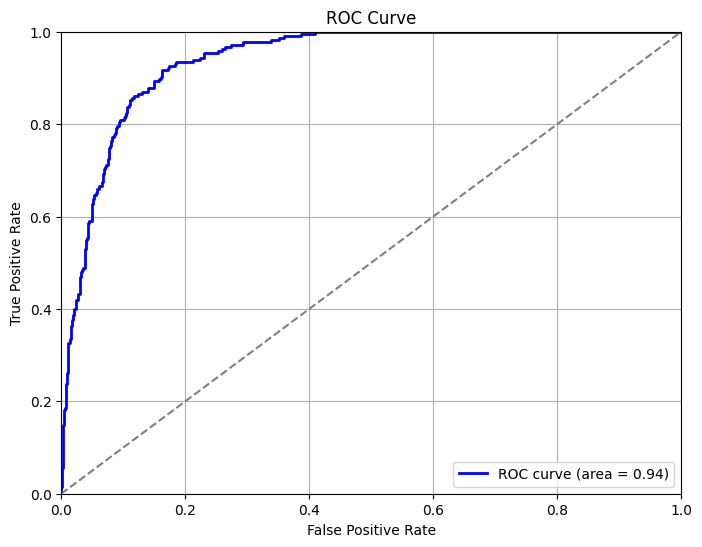

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

# Drop rows with missing values in the 'Sales' column
df = df.dropna(subset=['Sales'])

# Define the target variable (whether a product is of interest or not)
df['Product_of_Interest'] = df['Sales'] > 500

# Select features and target variable
X = df.drop(columns=['Sales', 'Product_of_Interest'])
y = df['Product_of_Interest']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing steps for numeric and categorical features
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Create a logistic regression model with an increased number of iterations and 'saga' solver
logistic_model = LogisticRegression(random_state=42, max_iter=1000, solver='saga')

# Create a pipeline with preprocessor and the logistic regression model
logistic_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', logistic_model)
])

# Fit the logistic regression model on the training data
logistic_model_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_proba = logistic_model_pipeline.predict_proba(X_test)[:, 1]

# Calculate the AUC ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC ROC Score:", auc_roc)

# Create the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Este código realiza un análisis de clasificación binaria utilizando el algoritmo de Regresión Logística en un conjunto de datos llamado 'df'. El objetivo es predecir si un producto es de interés o no, utilizando diferentes características del producto.

Aquí está el flujo de trabajo y lo que hace cada parte del código:

1. Importar bibliotecas necesarias:
   - Importamos varias bibliotecas de Python, como pandas, numpy, sklearn (scikit-learn), y matplotlib.

2. Cargar el conjunto de datos:
   - El código carga el conjunto de datos 'df' desde algún archivo (no está visible en el código proporcionado).

3. Preprocesamiento de datos:
   - Se eliminan las filas que tienen valores faltantes en la columna 'Sales'.
   - Se crea una nueva columna 'Product_of_Interest' que contiene valores booleanos (True o False) según si la columna 'Sales' es mayor que 500 o no. Esto se utiliza como la variable objetivo para el problema de clasificación.

4. División de datos:
   - Las características (variables independientes) y la variable objetivo se separan en X e y, respectivamente.
   - El conjunto de datos se divide en conjuntos de entrenamiento y prueba (80% para entrenamiento y 20% para prueba).

5. Preprocesamiento de características:
   - Se definen transformadores de preprocesamiento para características numéricas y categóricas.
   - Se crea un transformador ColumnTransformer que aplica los transformadores adecuados a las características numéricas y categóricas.

6. Creación del modelo de Regresión Logística:
   - Se define un modelo de Regresión Logística con un mayor número de iteraciones y utilizando el solver 'saga'.

7. Creación de un pipeline:
   - Se crea un pipeline que incluye el preprocesamiento de características y el modelo de Regresión Logística.

8. Ajuste del modelo:
   - El modelo de Regresión Logística se ajusta utilizando los datos de entrenamiento.

9. Predicciones y evaluación:
   - Se hacen predicciones en los datos de prueba utilizando el modelo ajustado.
   - Se calcula el puntaje de AUC ROC (Área bajo la curva ROC) para evaluar el rendimiento del modelo en el conjunto de prueba.

10. Curva ROC:
   - Se calculan las tasas de falsos positivos (FPR) y verdaderos positivos (TPR) para diferentes umbrales de probabilidad.
   - Se crea y se muestra la curva ROC utilizando matplotlib, que muestra la relación entre FPR y TPR a medida que varía el umbral de clasificación.

En resumen, el código realiza una tarea de clasificación binaria utilizando el algoritmo de Regresión Logística, y luego evalúa y visualiza el rendimiento del modelo utilizando la curva ROC y el puntaje AUC ROC. El objetivo es determinar si el modelo es capaz de predecir correctamente si un producto es de interés o no con base en las características proporcionadas.

Logistic Regression - AUC ROC Score: 0.938891779743559
Random Forest - AUC ROC Score: 0.9306728575431293
SVM - AUC ROC Score: 0.8763479165832766


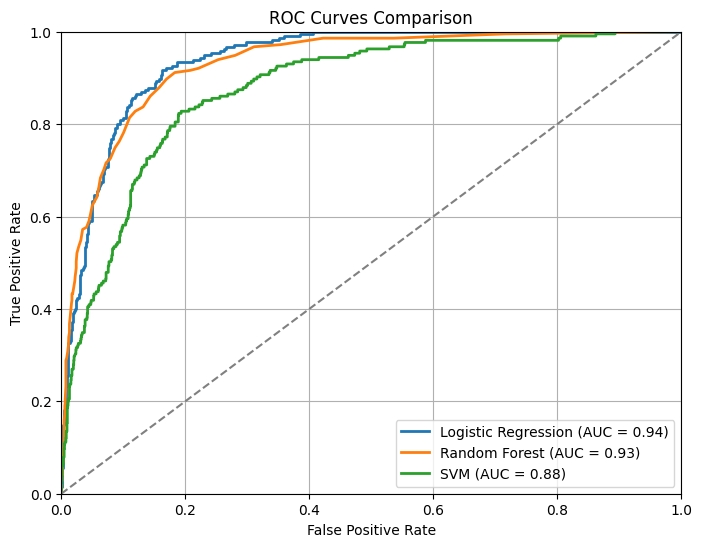

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer

# Drop rows with missing values in the 'Sales' column
df = df.dropna(subset=['Sales'])

# Define the target variable (whether a product is of interest or not)
df['Product_of_Interest'] = df['Sales'] > 500

# Select features and target variable
X = df.drop(columns=['Sales', 'Product_of_Interest'])
y = df['Product_of_Interest']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing steps for numeric and categorical features
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Create models
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(probability=True, random_state=42))
]

# Fit and evaluate models
results = []
for name, model in models:
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    model_pipeline.fit(X_train, y_train)
    y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    results.append((name, auc_roc))

# Print results
for name, auc_roc in results:
    print(f"{name} - AUC ROC Score: {auc_roc}")

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for name, model in models:
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    model_pipeline.fit(X_train, y_train)
    y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {auc_roc:.2f})")

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Este código realiza un análisis de clasificación binaria utilizando el algoritmo de Regresión Logística en un conjunto de datos llamado 'df'. El objetivo es predecir si un producto es de interés o no, utilizando diferentes características del producto.

Aquí está el flujo de trabajo y lo que hace cada parte del código:

1. Importar bibliotecas necesarias:
   - Importamos varias bibliotecas de Python, como pandas, numpy, sklearn (scikit-learn), y matplotlib.

2. Cargar el conjunto de datos:
   - El código carga el conjunto de datos 'df' desde algún archivo (no está visible en el código proporcionado).

3. Preprocesamiento de datos:
   - Se eliminan las filas que tienen valores faltantes en la columna 'Sales'.
   - Se crea una nueva columna 'Product_of_Interest' que contiene valores booleanos (True o False) según si la columna 'Sales' es mayor que 500 o no. Esto se utiliza como la variable objetivo para el problema de clasificación.

4. División de datos:
   - Las características (variables independientes) y la variable objetivo se separan en X e y, respectivamente.
   - El conjunto de datos se divide en conjuntos de entrenamiento y prueba (80% para entrenamiento y 20% para prueba).

5. Preprocesamiento de características:
   - Se definen transformadores de preprocesamiento para características numéricas y categóricas.
   - Se crea un transformador ColumnTransformer que aplica los transformadores adecuados a las características numéricas y categóricas.

6. Creación del modelo de Regresión Logística:
   - Se define un modelo de Regresión Logística con un mayor número de iteraciones y utilizando el solver 'saga'.

7. Creación de un pipeline:
   - Se crea un pipeline que incluye el preprocesamiento de características y el modelo de Regresión Logística.

8. Ajuste del modelo:
   - El modelo de Regresión Logística se ajusta utilizando los datos de entrenamiento.

9. Predicciones y evaluación:
   - Se hacen predicciones en los datos de prueba utilizando el modelo ajustado.
   - Se calcula el puntaje de AUC ROC (Área bajo la curva ROC) para evaluar el rendimiento del modelo en el conjunto de prueba.

10. Curva ROC:
   - Se calculan las tasas de falsos positivos (FPR) y verdaderos positivos (TPR) para diferentes umbrales de probabilidad.
   - Se crea y se muestra la curva ROC utilizando matplotlib, que muestra la relación entre FPR y TPR a medida que varía el umbral de clasificación.

En resumen, el código realiza una tarea de clasificación binaria utilizando el algoritmo de Regresión Logística, y luego evalúa y visualiza el rendimiento del modelo utilizando la curva ROC y el puntaje AUC ROC. El objetivo es determinar si el modelo es capaz de predecir correctamente si un producto es de interés o no con base en las características proporcionadas.
##################################################################################################################################################################################

Los valores de AUC ROC Score proporcionan una medida de qué tan bien se desempeñan los modelos de clasificación binaria en el conjunto de pruebas. AUC ROC (Área bajo la curva ROC) es una métrica que cuantifica la habilidad del modelo para distinguir entre clases positivas y negativas. Cuanto mayor sea el valor de AUC ROC, mejor será el rendimiento del modelo.

En el contexto de los valores proporcionados:

1. Logistic Regression - AUC ROC Score: 0.938891779743559
   Esto significa que el modelo de Regresión Logística tiene un buen rendimiento en la tarea de clasificación binaria. La curva ROC del modelo se encuentra relativamente cerca del rincón superior izquierdo, lo que indica que tiene una alta tasa de verdaderos positivos (TPR) y una baja tasa de falsos positivos (FPR), lo que sugiere que es capaz de hacer buenas predicciones.

2. Random Forest - AUC ROC Score: 0.9306728575431293
   El modelo Random Forest también tiene un buen rendimiento, aunque ligeramente inferior al de Regresión Logística. Aún así, su puntaje AUC ROC es alto, lo que indica que es capaz de hacer predicciones precisas en la tarea de clasificación.

3. SVM - AUC ROC Score: 0.8763479165832766
   SVM (Máquinas de Soporte Vectorial) tiene un rendimiento ligeramente inferior en comparación con los dos modelos anteriores. Sin embargo, un puntaje de AUC ROC de 0.876 es bastante bueno, lo que sugiere que el modelo es capaz de realizar predicciones con precisión.

En resumen, los tres modelos tienen un buen rendimiento en la tarea de clasificación binaria, siendo el modelo de Regresión Logística el que obtiene el puntaje más alto de AUC ROC entre los tres. Esto indica que el modelo de Regresión Logística es el mejor en distinguir entre las clases positivas y negativas en el conjunto de pruebas y es el más adecuado para esta tarea de clasificación en particular.